# Insights

## precipitation

In [1]:
import pandas as pd
import numpy as np
#==================================

import matplotlib.pyplot as plt
import geopandas as gpd



In [2]:
info_prec = pd.read_parquet('data/fedearroz_prec_diaria_2024.parquet')


In [3]:
info_prec.head()

,lat,lon,dpto,mun,date,precipitation,station,evento_lluvia
0,4.39333,-72.98889,META,UPIA,2015-07-06,0.0,BARRANCA_DE_UPIA,0.0
1,4.39333,-72.98889,META,UPIA,2015-07-07,0.0,BARRANCA_DE_UPIA,0.0
2,4.39333,-72.98889,META,UPIA,2015-07-08,NaN,BARRANCA_DE_UPIA,NaN
3,4.39333,-72.98889,META,UPIA,2015-07-09,NaN,BARRANCA_DE_UPIA,NaN
4,4.39333,-72.98889,META,UPIA,2015-07-10,NaN,BARRANCA_DE_UPIA,NaN


# summary

In [4]:
info_prec['date'] = pd.to_datetime(info_prec['date'])
grouped = info_prec.groupby(['lat', 'lon', 'dpto', 'mun', 'station']).agg(
    fecha_max=('date', 'max'),
    fecha_min=('date', 'min'),
    total_dias=('precipitation', 'size'),  # Total de registros por grupo
    eventos=('evento_lluvia', lambda x: (x == 1).sum()),
    noeventos=('evento_lluvia', lambda x: (x ==0).sum()),
    vacios=('precipitation', lambda x: x.isna().sum())  # Total de vacíos
)



def diferencia_meses(fecha_max, fecha_min):
    return (fecha_max.year - fecha_min.year) * 12 + fecha_max.month - fecha_min.month

# Aplicar la función para calcular los meses de historia
grouped['historia_meses'] = grouped.apply(lambda row: diferencia_meses(row['fecha_max'], row['fecha_min']), axis=1)

# Calcular porcentaje de vacíos
grouped['porcentaje_vacios'] = np.round((grouped['vacios'] / grouped['total_dias']) * 100,1)
grouped['porcentaje_eventos'] = np.round((grouped['eventos'] / grouped['total_dias']) * 100,1)

grouped

,,,,,fecha_max,fecha_min,total_dias,eventos,noeventos,vacios,historia_meses,porcentaje_vacios,porcentaje_eventos
lat,lon,dpto,mun,station,,,,,,,,,
2.698140,-75.298150,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2024-08-15,2011-10-11,4693,1645,2880,168,154,3.6,35.1
2.884570,-75.441660,HUILA,PALERMO,FEDEARROZ_PALERMO_ASOJUNCAL,2022-10-15,2011-08-24,4071,1287,2330,454,134,11.2,31.6
3.080830,-75.190830,HUILA,TELLO,FEDEARROZ_TELLO_SAN_DIEGO,2024-05-06,2017-01-10,2674,707,1665,302,88,11.3,26.4
3.246090,-75.239780,HUILA,AIPE,FEDEARROZ_AIPE_PIEDRAPINTADA,2024-08-15,2011-10-11,4693,1306,2788,599,154,12.8,27.8
3.302780,-73.567220,META,GRANADA,FEDEARROZ_GRANADA_LOS_NARANJOS,2024-05-06,2011-09-15,4618,1980,2227,411,152,8.9,42.9
3.672160,-73.753350,META,SAN MARTIN,FEDEARROZ_SAN_MARTIN_MAYORAL,2024-05-06,2015-01-01,3414,649,623,2142,112,62.7,19.0
3.760350,-74.926380,TOLIMA,PRADO,FEDEARROZ_PRADO_ASOPRADO,2024-02-01,2011-09-20,4518,1165,1911,1442,149,31.9,25.8
3.828880,-73.685480,META,CASTILLA LA NUEVA,FEDEARROZ_CASTILLA_LA_NUEVA_CAPACHOS,2023-10-06,2011-09-01,4419,2136,1886,397,145,9.0,48.3
3.914500,-74.980060,TOLIMA,SALDANA,FEDEARROZ_SALDANA_LAS_LAGUNAS,2024-05-06,2011-09-14,4619,1433,2601,585,152,12.7,31.0


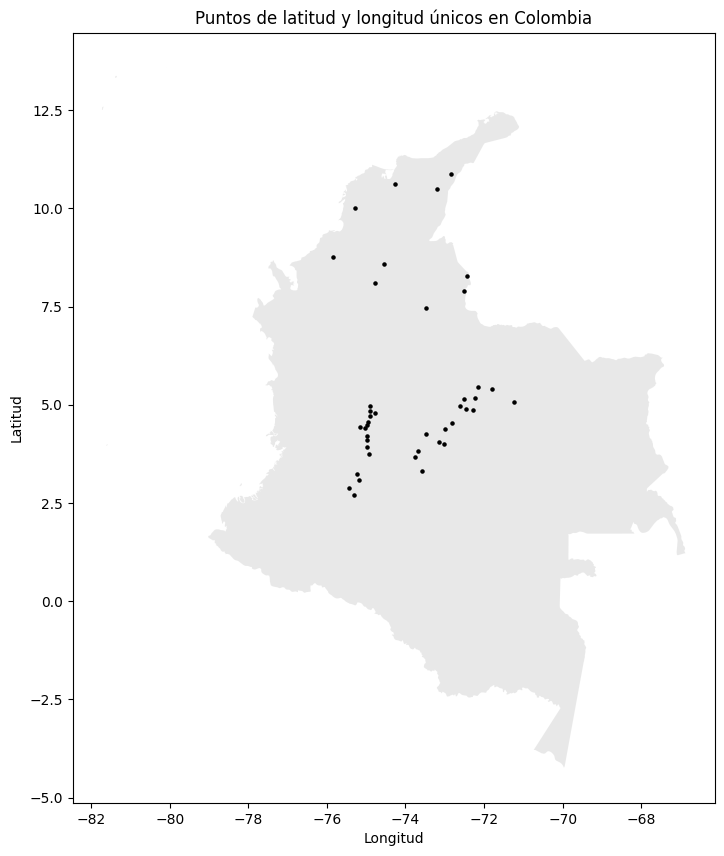

In [5]:

info_prec_unique = info_prec.drop_duplicates(subset=['lat', 'lon'])

# Cargar el shapefile descargado manualmente de Natural Earth
shapefile_path = 'maps/ne_10m_admin_0_countries.shp'  # Reemplaza con la ruta correcta
world = gpd.read_file(shapefile_path)

# Filtrar solo Colombia del shapefile global
colombia = world[world['ADMIN'] == 'Colombia']

# Crear un GeoDataFrame con los puntos únicos de lat y lon
gdf = gpd.GeoDataFrame(info_prec_unique, geometry=gpd.points_from_xy(info_prec_unique.lon, info_prec_unique.lat))

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='lightgray', alpha=0.5)  # Mapa base de Colombia
gdf.plot(ax=ax, color='black', markersize=5)  # Puntos de latitud y longitud

plt.title('Puntos de latitud y longitud únicos en Colombia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


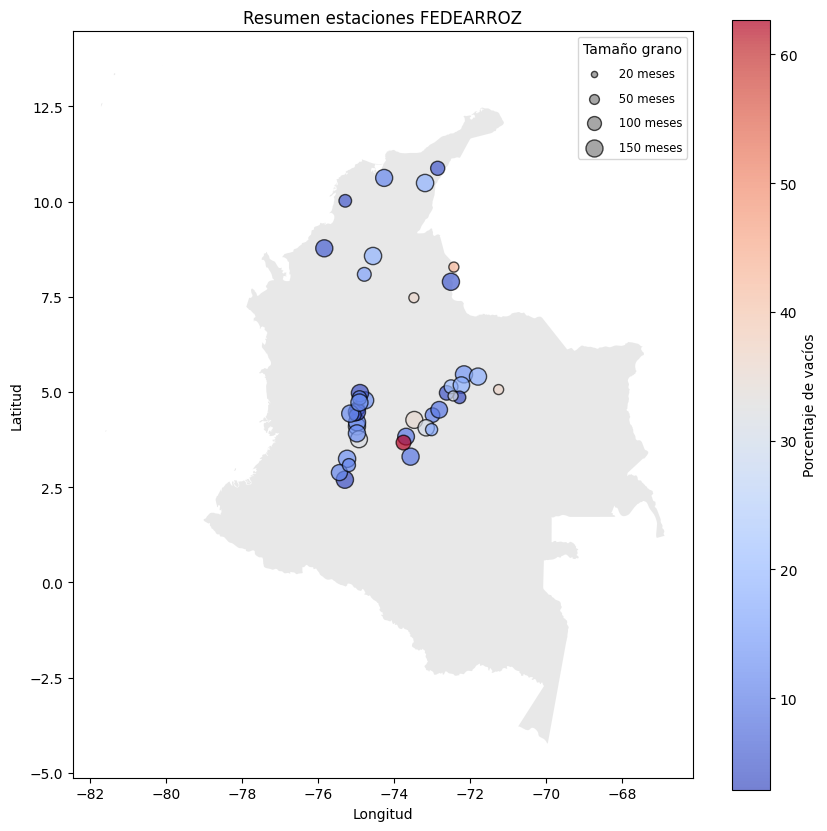

In [6]:


# Crear un GeoDataFrame con los puntos únicos de lat y lon
gdf = gpd.GeoDataFrame(info_prec_unique, geometry=gpd.points_from_xy(info_prec_unique.lon, info_prec_unique.lat))

# Fusionar grouped con info_prec_unique para obtener las columnas necesarias
merged = pd.merge(info_prec_unique, grouped, on=['lat', 'lon', 'dpto', 'mun', 'station'], how='left')

# Crear un GeoDataFrame a partir del DataFrame fusionado
gdf_merged = gpd.GeoDataFrame(merged, geometry=gpd.points_from_xy(merged.lon, merged.lat))

# Cargar el shapefile de Colombia
shapefile_path = 'maps/ne_10m_admin_0_countries.shp'  # Reemplaza con la ruta correcta
world = gpd.read_file(shapefile_path)
colombia = world[world['ADMIN'] == 'Colombia']

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='lightgray', alpha=0.5)  # Mapa base de Colombia

# Crear un scatter plot donde el color es proporcional al porcentaje de vacíos y el tamaño a la historia en meses
sc = ax.scatter(
    gdf_merged.geometry.x, gdf_merged.geometry.y,
    c=gdf_merged['porcentaje_vacios'],  # Colores basados en el porcentaje de vacíos
    s=gdf_merged['historia_meses'],  # Tamaño proporcional a la historia en meses
    cmap='coolwarm',  # Mapa de color de rojo a azul
    alpha=0.7,
    edgecolor='k'
)

# Añadir una barra de colores para el porcentaje de vacíos
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Porcentaje de vacíos')

# Añadir una leyenda personalizada para el tamaño de los puntos
# Definir algunos valores representativos de 'historia_meses' para mostrar en la leyenda
for size in [20,50, 100, 150]:  # Puedes ajustar estos valores de ejemplo
    ax.scatter([], [], s=size, color='gray', alpha=0.7, edgecolor='k', label=f' {size} meses')

# Mostrar la leyenda con etiquetas más pequeñas
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Tamaño grano', fontsize='small')

# Etiquetas y título
plt.title('Resumen estaciones FEDEARROZ')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()


## DATA MENSUAL

In [7]:
monthly = pd.read_parquet('data/prec_monthly_obs_sat.parquet')

In [8]:
monthly

,latitud,longitud,dpto,mun,station,month_year,fuente,prec_month
0,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,agera5-precipitation,228.520000
1,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,chirps-precipitation,436.494230
2,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,ideam,513.200000
3,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-12,agera5-precipitation,164.050001
4,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-12,chirps-precipitation,242.482750
...,...,...,...,...,...,...,...,...
11189,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-11,chirps-precipitation,190.283857
11190,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-11,ideam,412.410000
11191,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-12,agera5-precipitation,27.180000
11192,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-12,chirps-precipitation,15.484619


In [9]:
monthly.dpto.value_counts()

dpto
TOLIMA                3711
CASANARE              2228
META                  1553
HUILA                 1191
BOLIVAR                553
NORTE DE SANTANDER     472
CORDOBA                407
MAGDALENA              362
GUAJIRA                282
ANTIOQUIA              219
CESAR                  216
Name: count, dtype: int64

/var/tmp/ipykernel_13545/1141205661.py:5: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(monthly['month_year']):


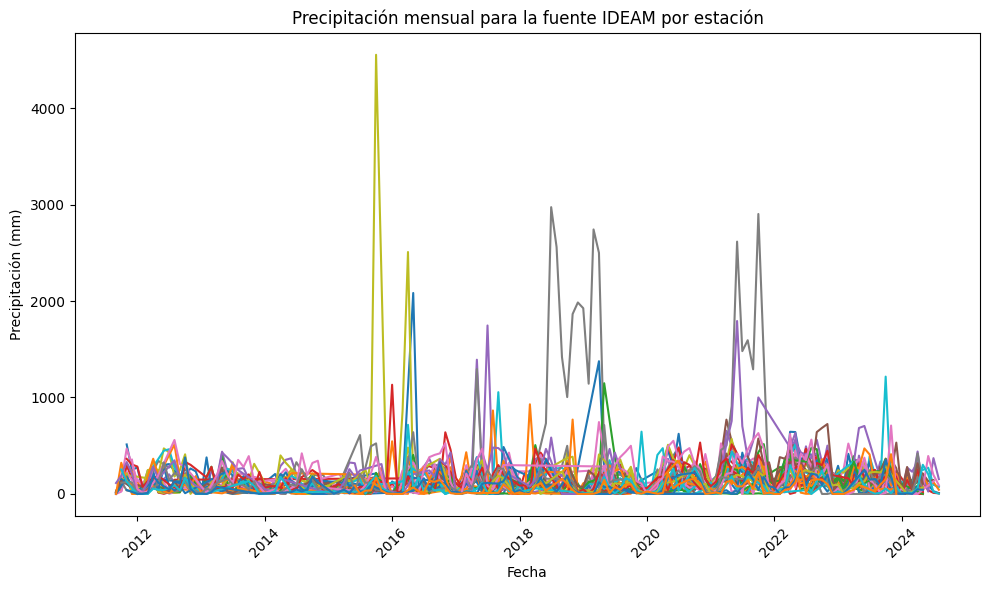

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'month_year' de Period a Timestamp
if pd.api.types.is_period_dtype(monthly['month_year']):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())

# Filtrar el DataFrame para la fuente IDEAM
df_ideam = monthly[monthly['fuente'] == 'ideam']

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar una línea para cada estación
for station in df_ideam['station'].unique():
    df_station = df_ideam[df_ideam['station'] == station]
    plt.plot(df_station['month_year'], df_station['prec_month'], label=station)

# Añadir título y etiquetas
plt.title('Precipitación mensual para la fuente IDEAM por estación')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')

# Añadir la leyenda con un tamaño de fuente más pequeño
#plt.legend(title='Estación', fontsize='small')

# Ajustar la rotación de los ticks en el eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


/var/tmp/ipykernel_13545/218942712.py:5: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(monthly['month_year']):


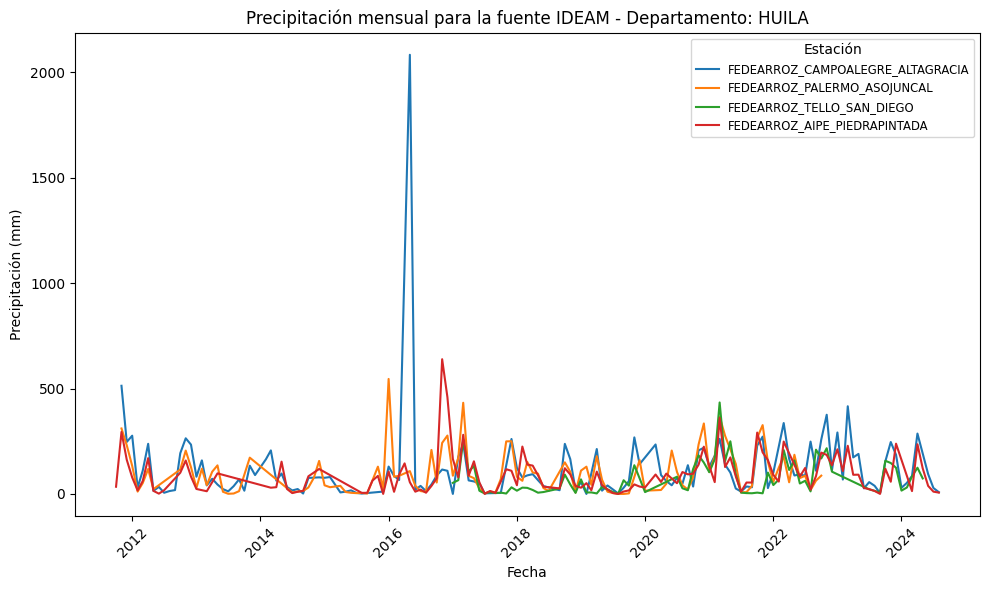

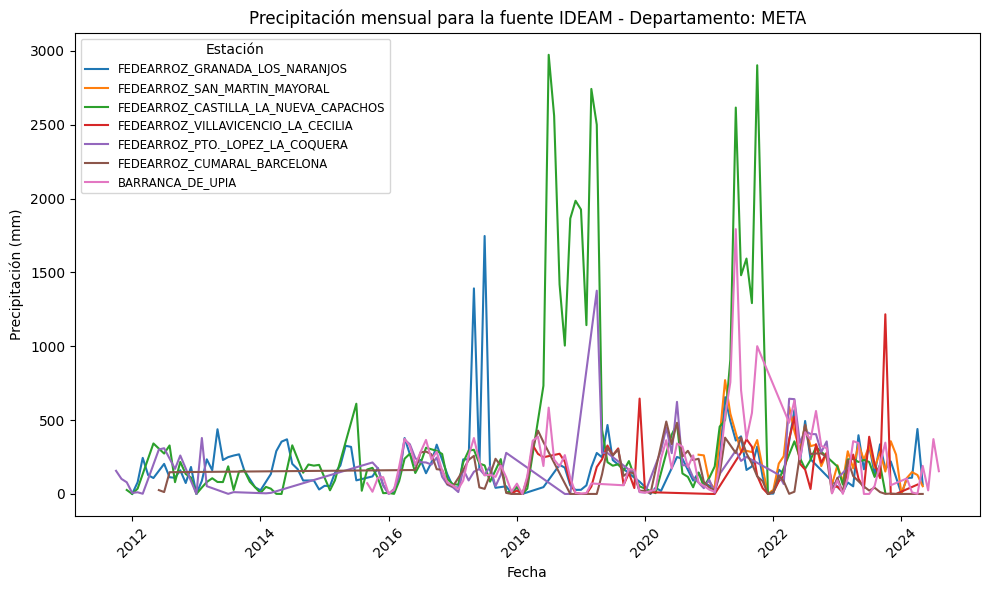

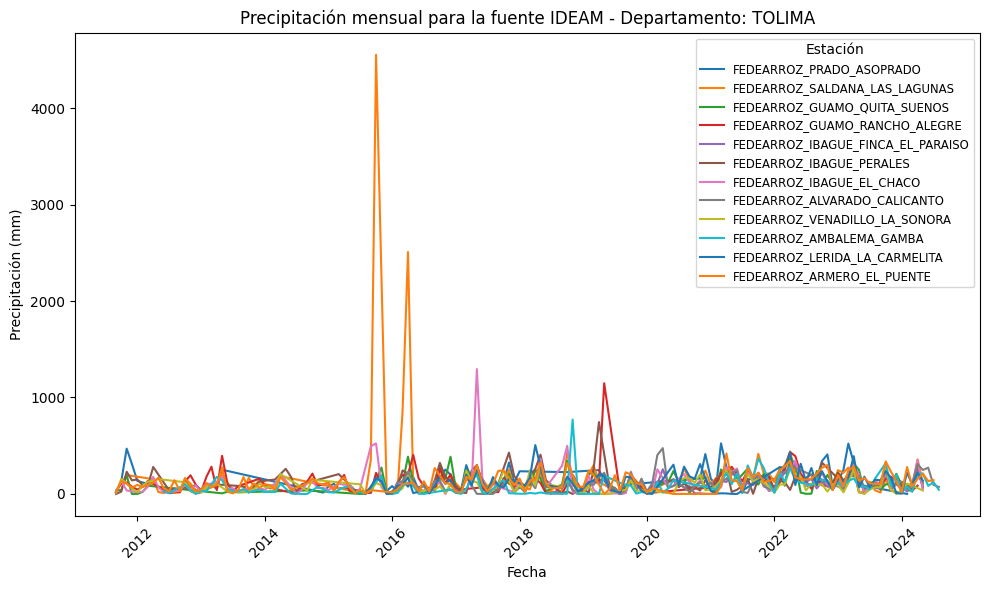

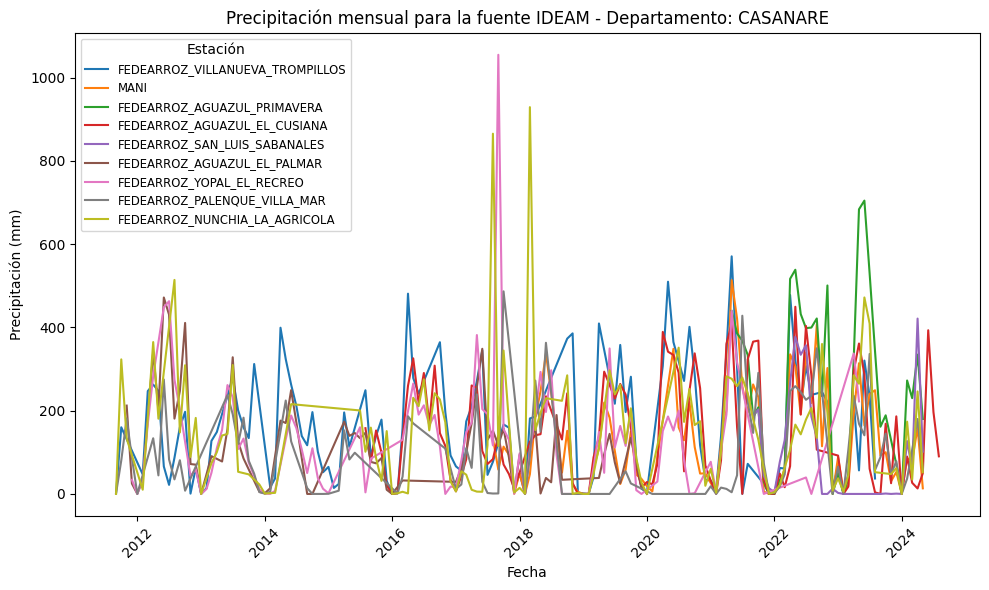

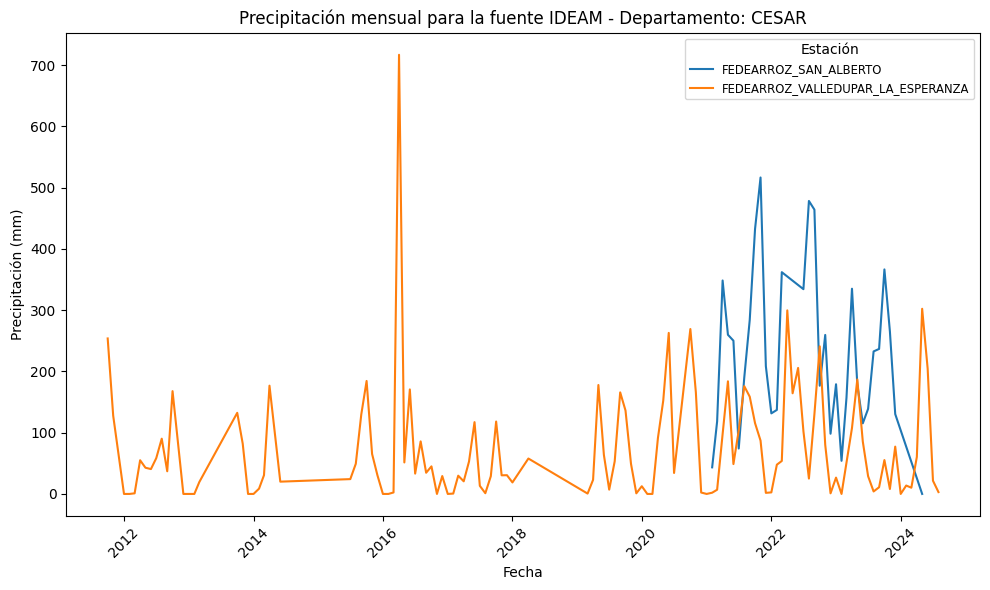

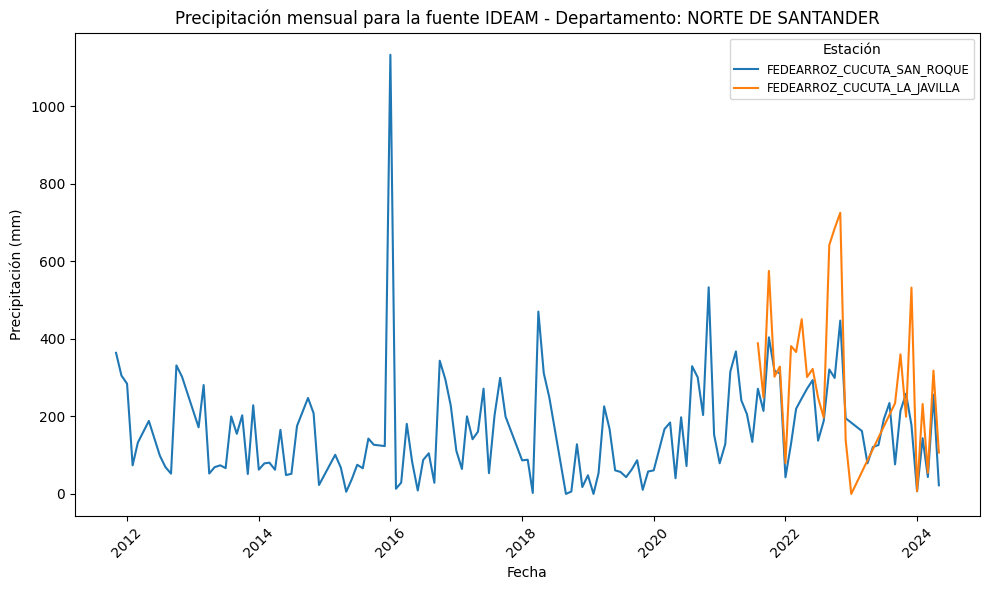

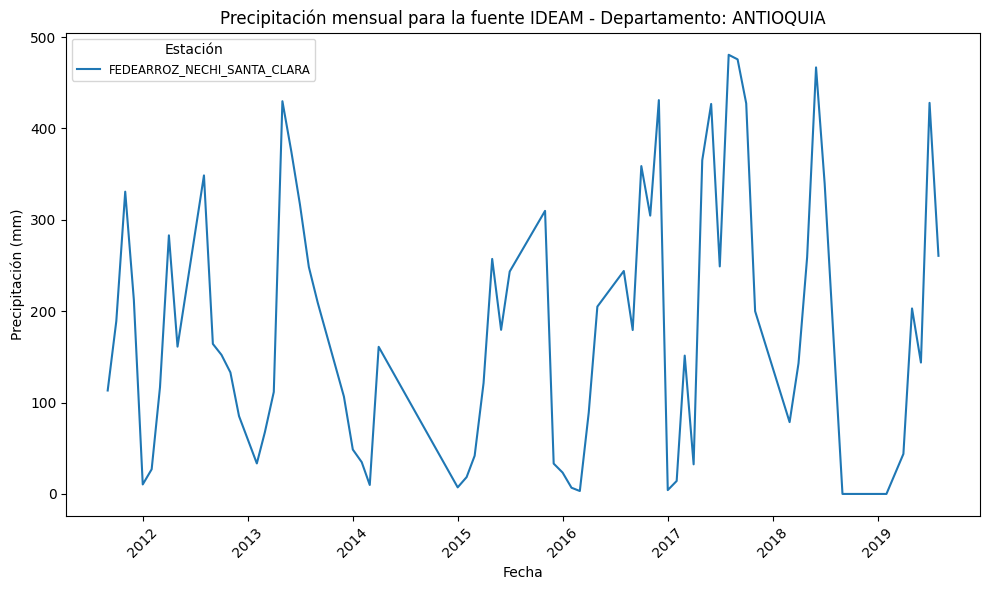

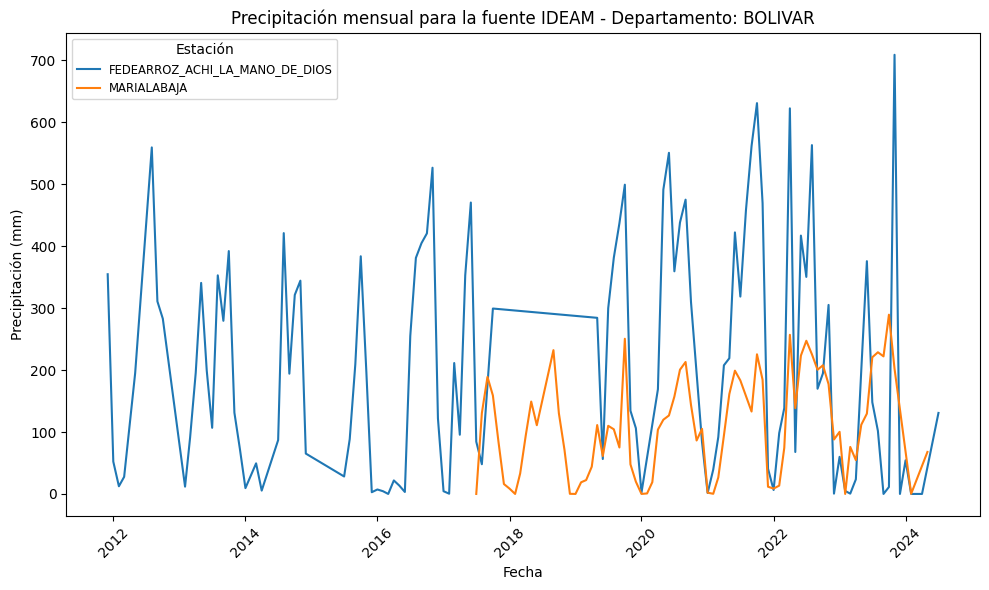

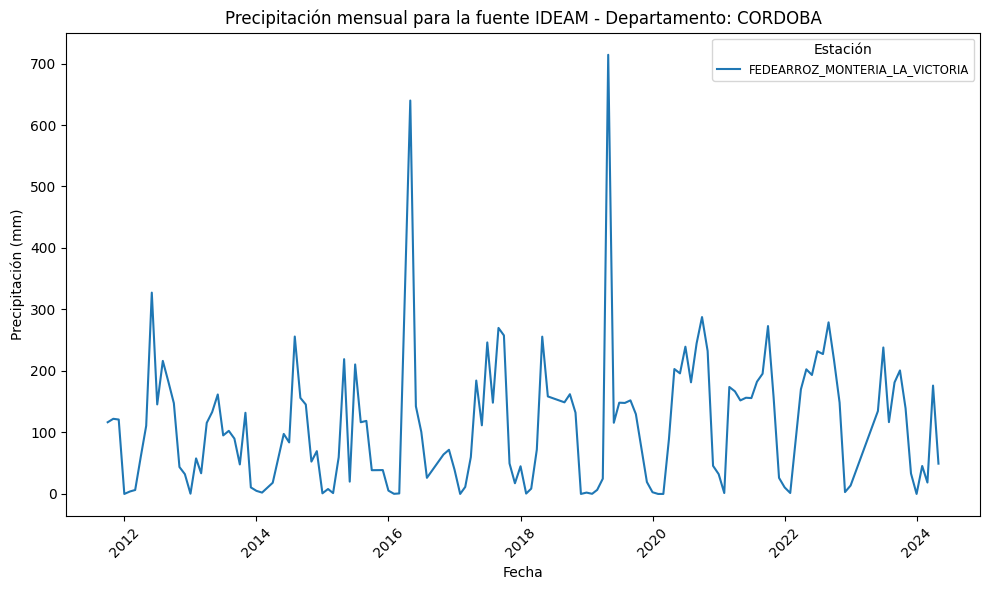

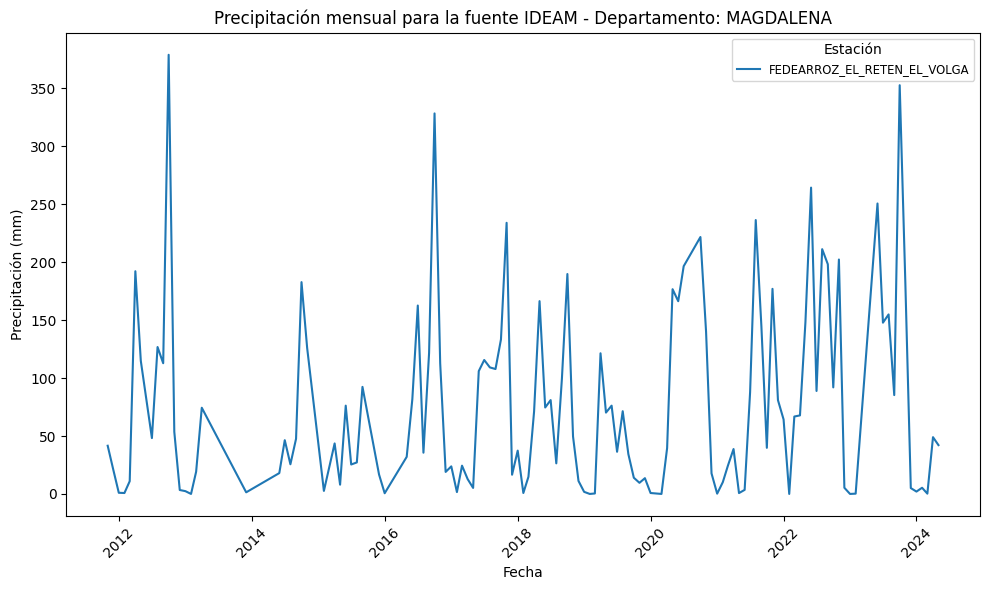

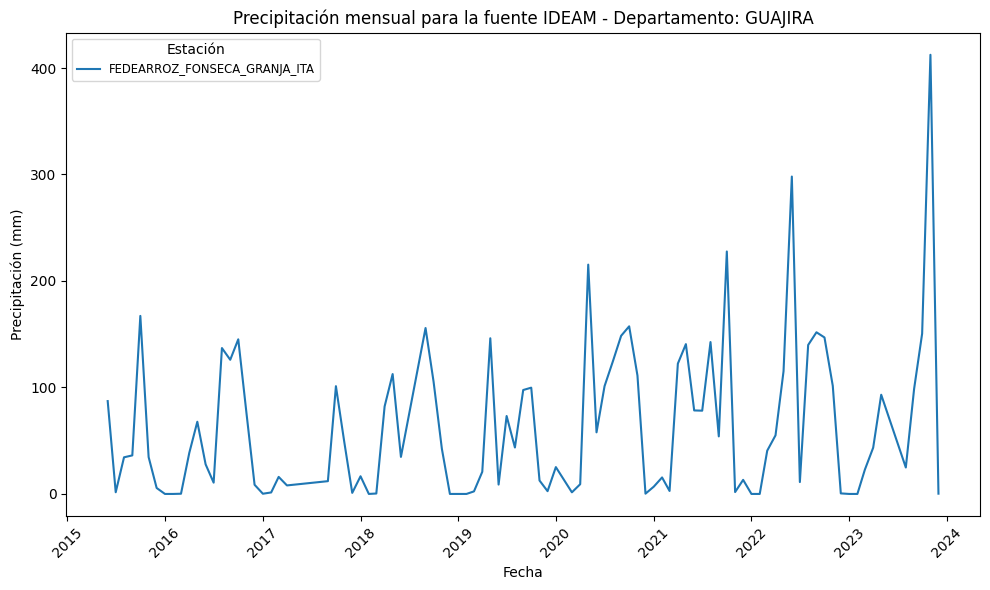

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'month_year' de Period a Timestamp si es necesario
if pd.api.types.is_period_dtype(monthly['month_year']):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())

# Filtrar el DataFrame para la fuente IDEAM
df_ideam = monthly[monthly['fuente'] == 'ideam']

# Crear una gráfica separada para cada departamento
for dpto in df_ideam['dpto'].unique():
    df_dpto = df_ideam[df_ideam['dpto'] == dpto]
    
    plt.figure(figsize=(10, 6))

    # Graficar una línea para cada estación dentro del departamento
    for station in df_dpto['station'].unique():
        df_station = df_dpto[df_dpto['station'] == station]
        plt.plot(df_station['month_year'], df_station['prec_month'], label=station)

    # Añadir título y etiquetas
    plt.title(f'Precipitación mensual para la fuente IDEAM - Departamento: {dpto}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación (mm)')

    # Añadir la leyenda con un tamaño de fuente más pequeño
    plt.legend(title='Estación', fontsize='small')

    # Ajustar la rotación de los ticks en el eje X para mejorar la legibilidad
    plt.xticks(rotation=45)

    # Ajustar el layout para que no se solapen los elementos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()


/var/tmp/ipykernel_13545/3269962668.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(monthly['month_year']):


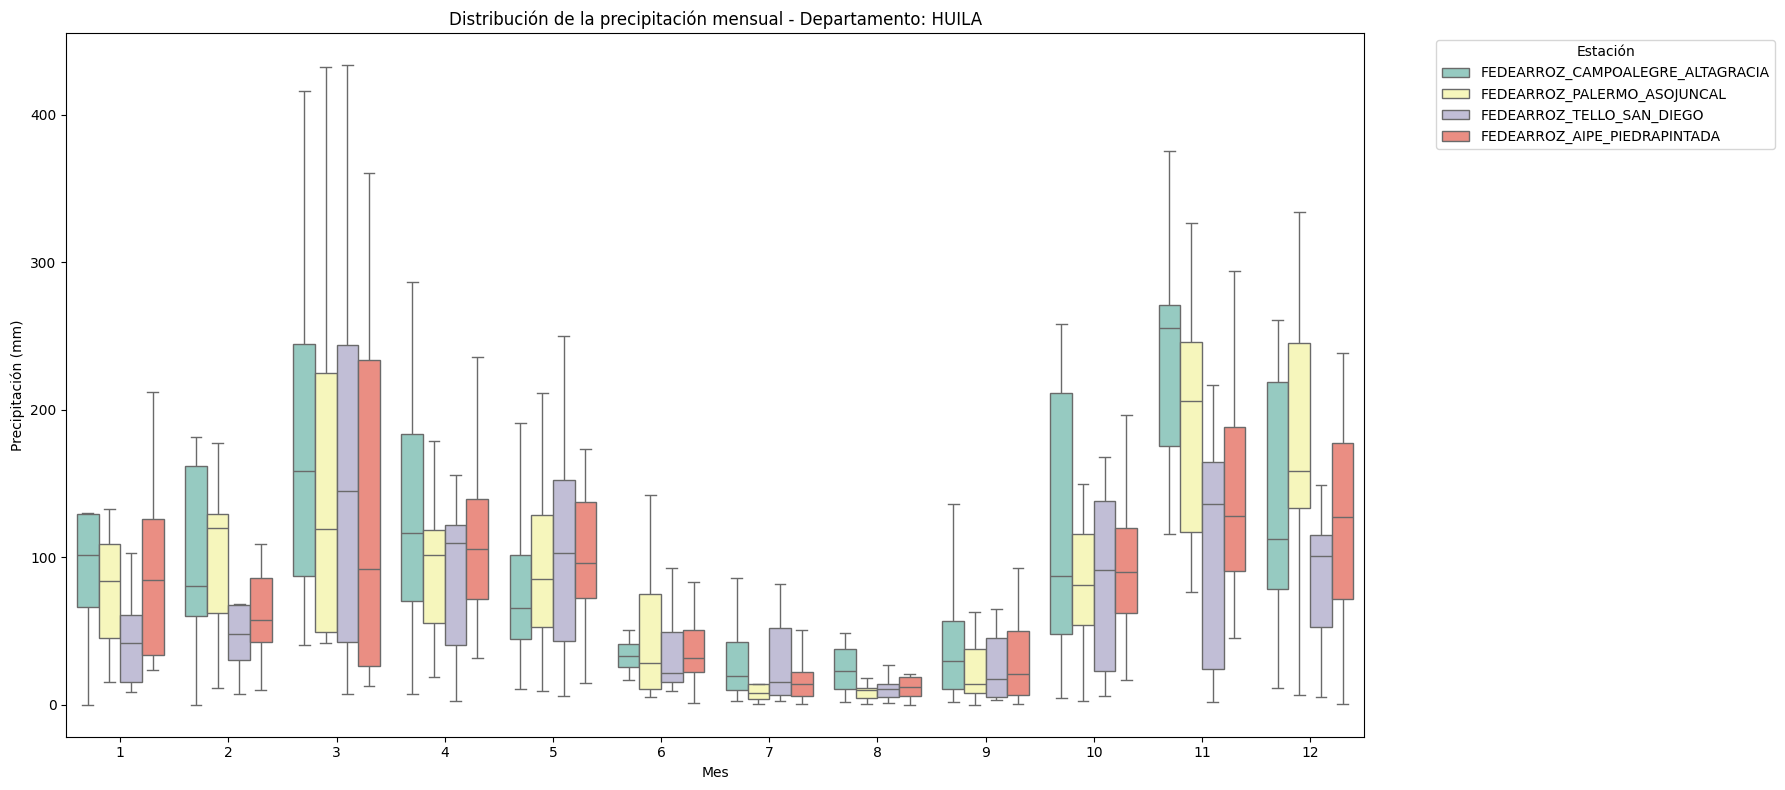

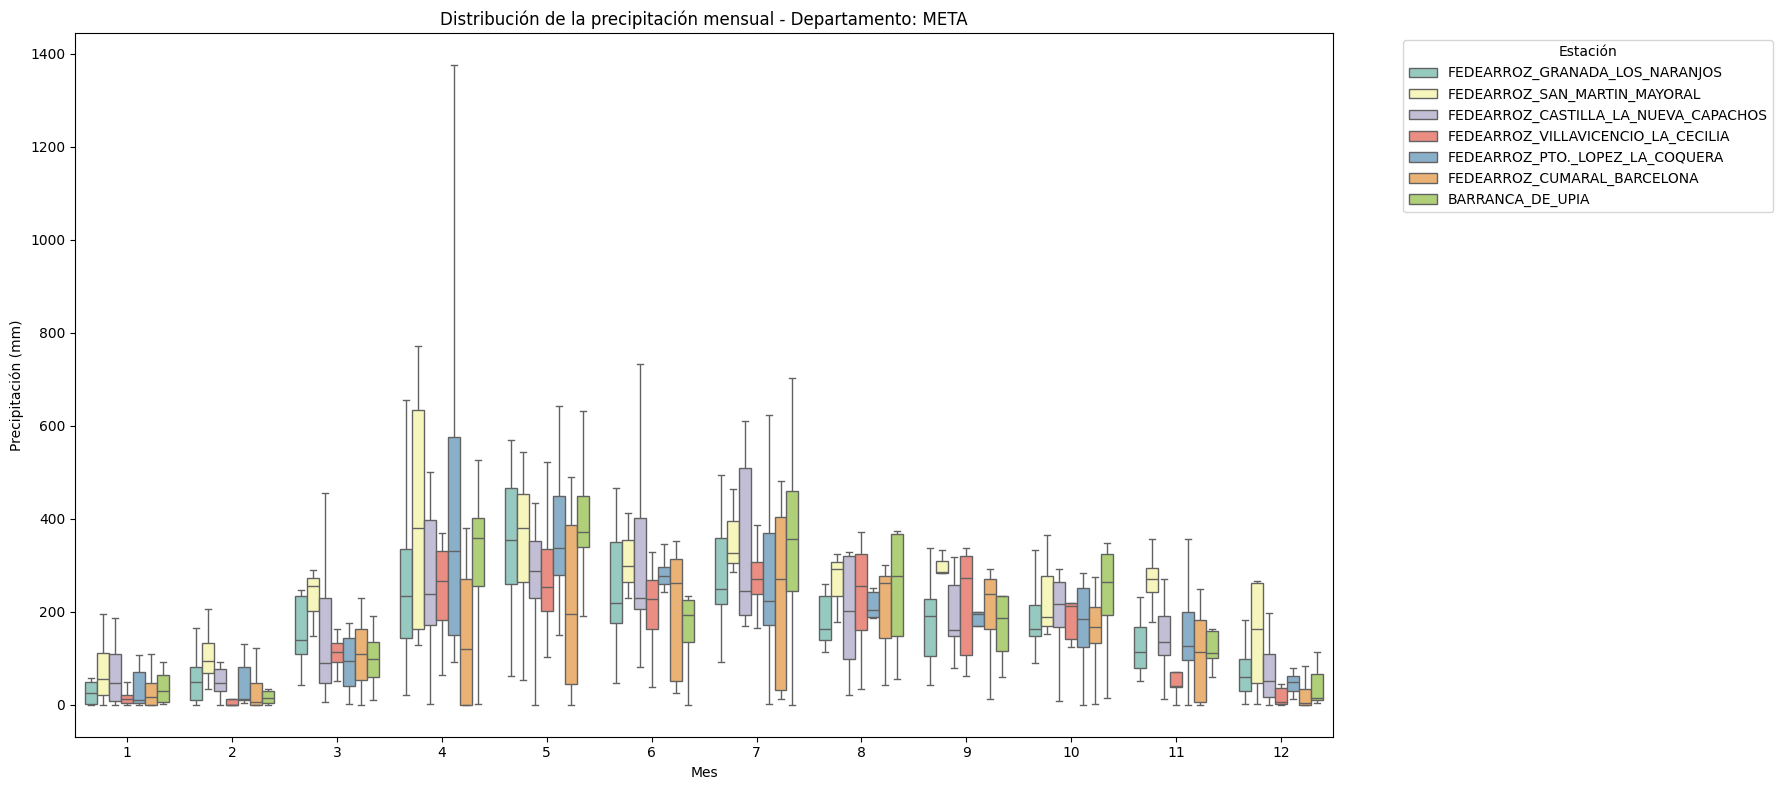

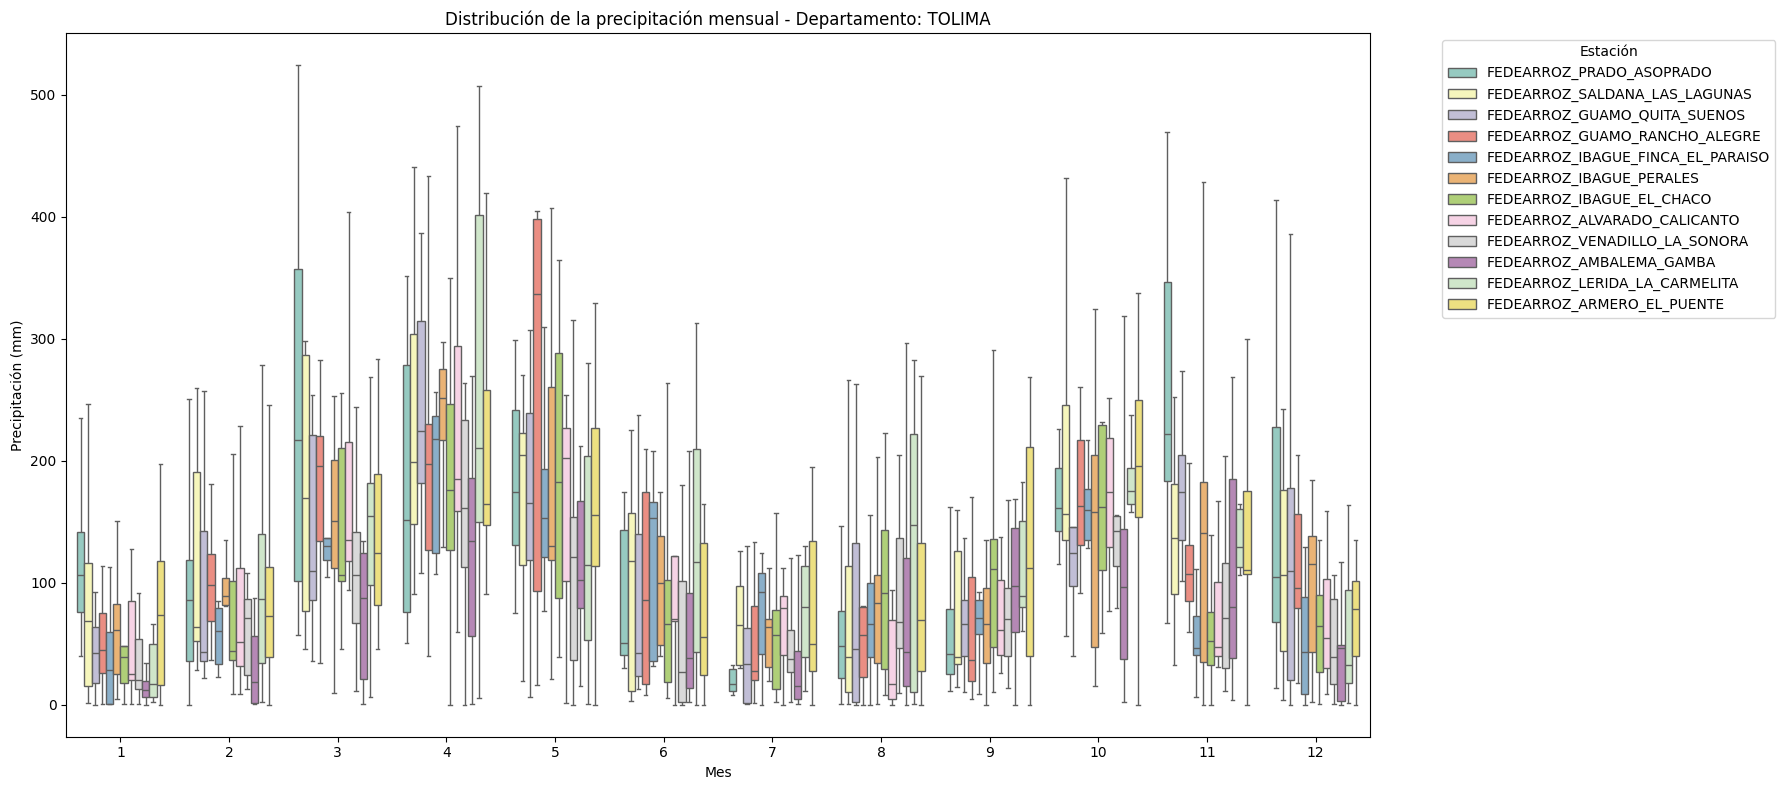

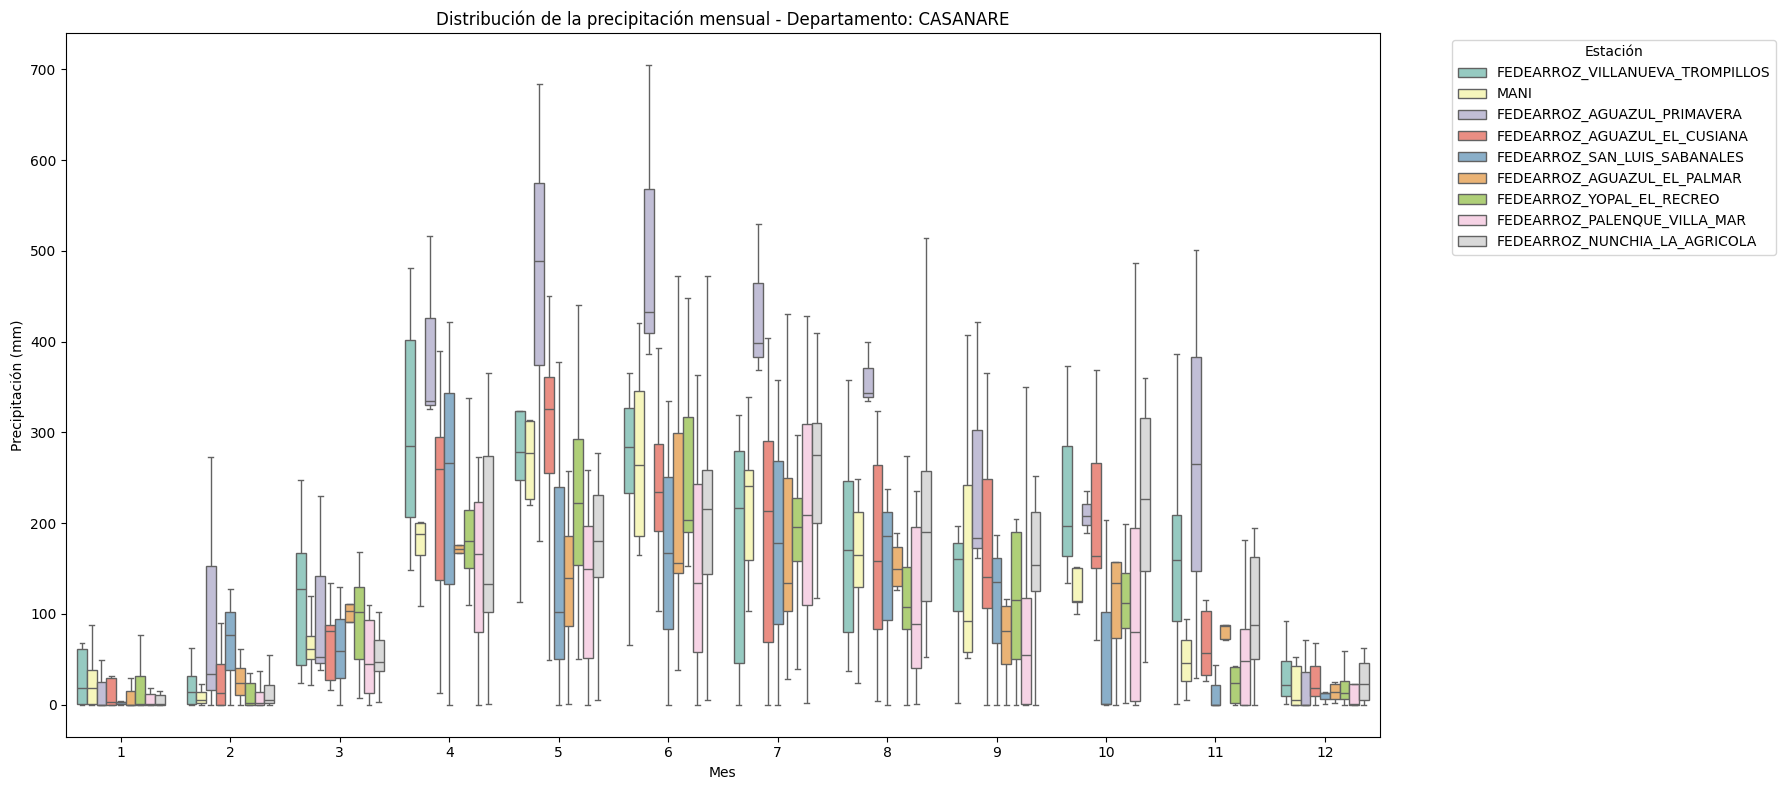

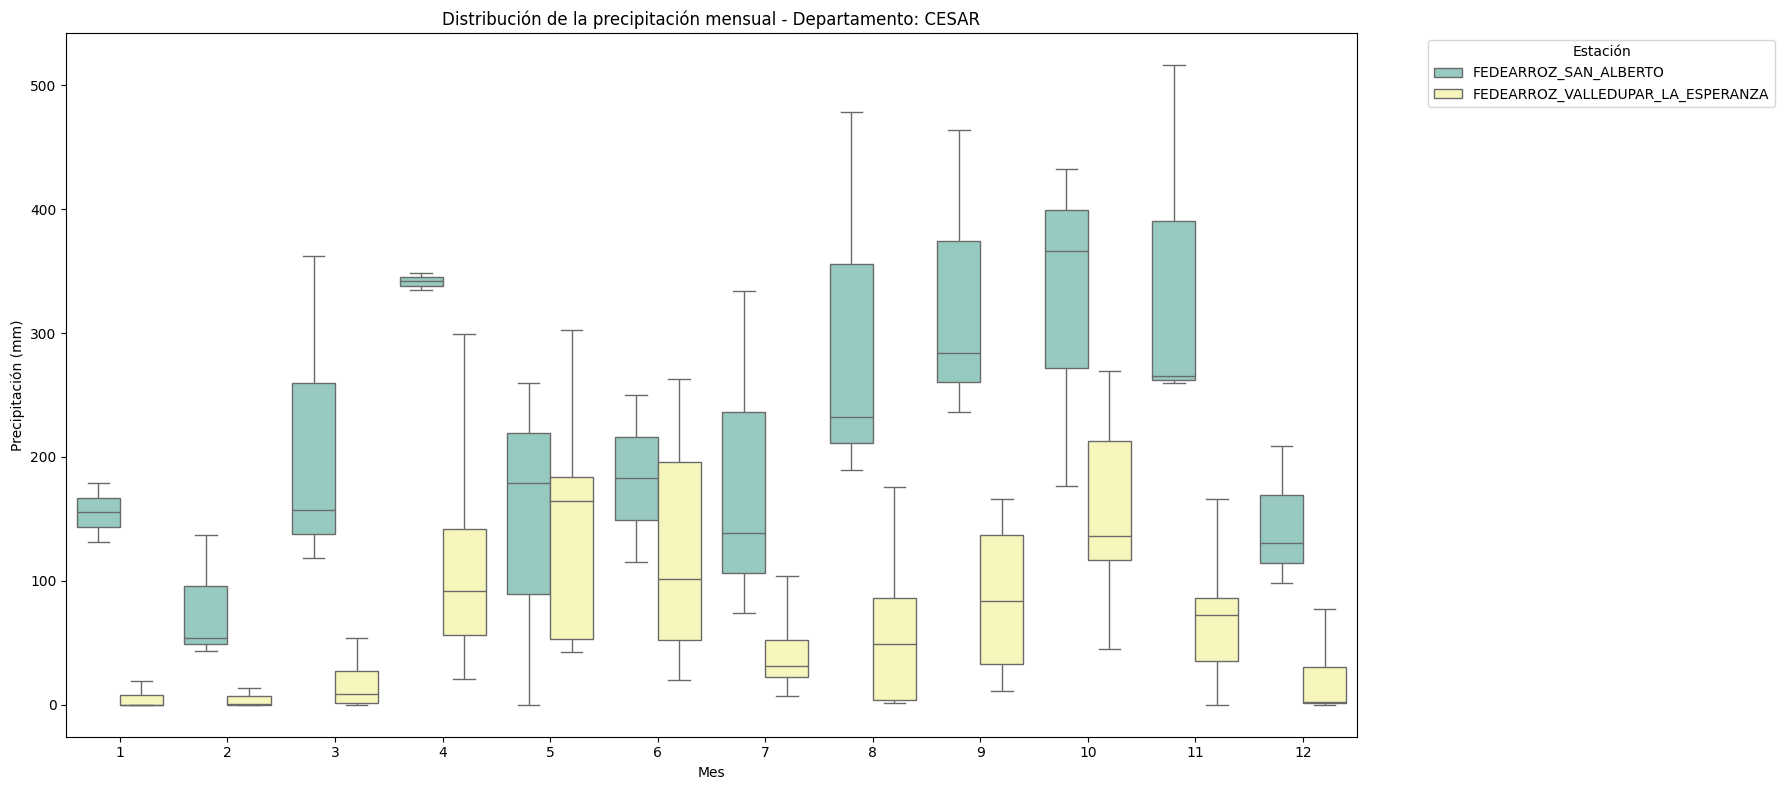

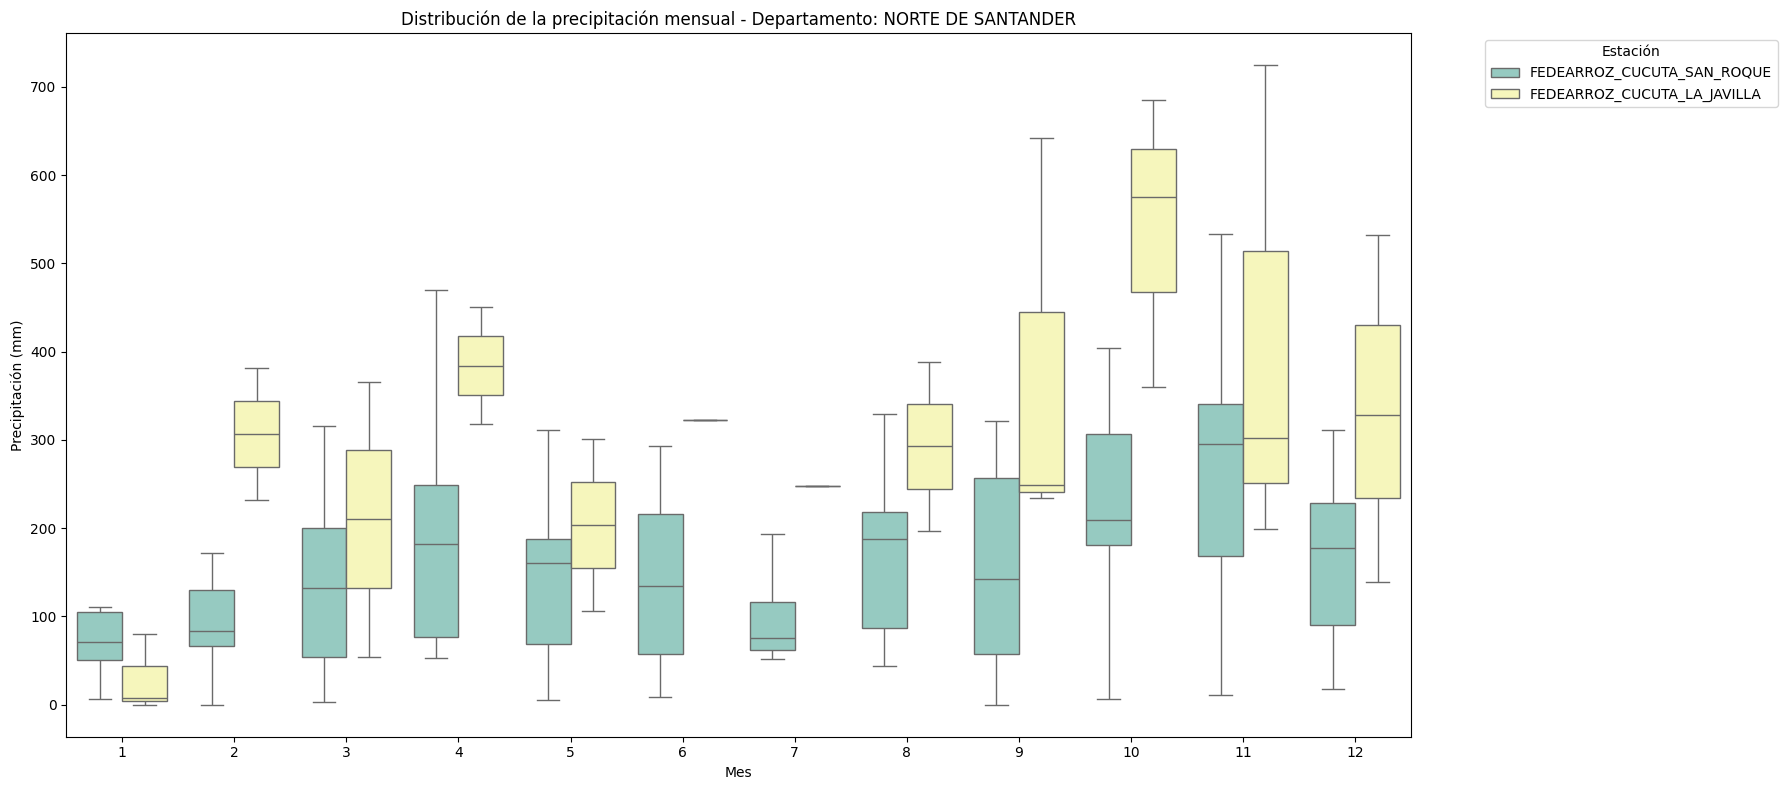

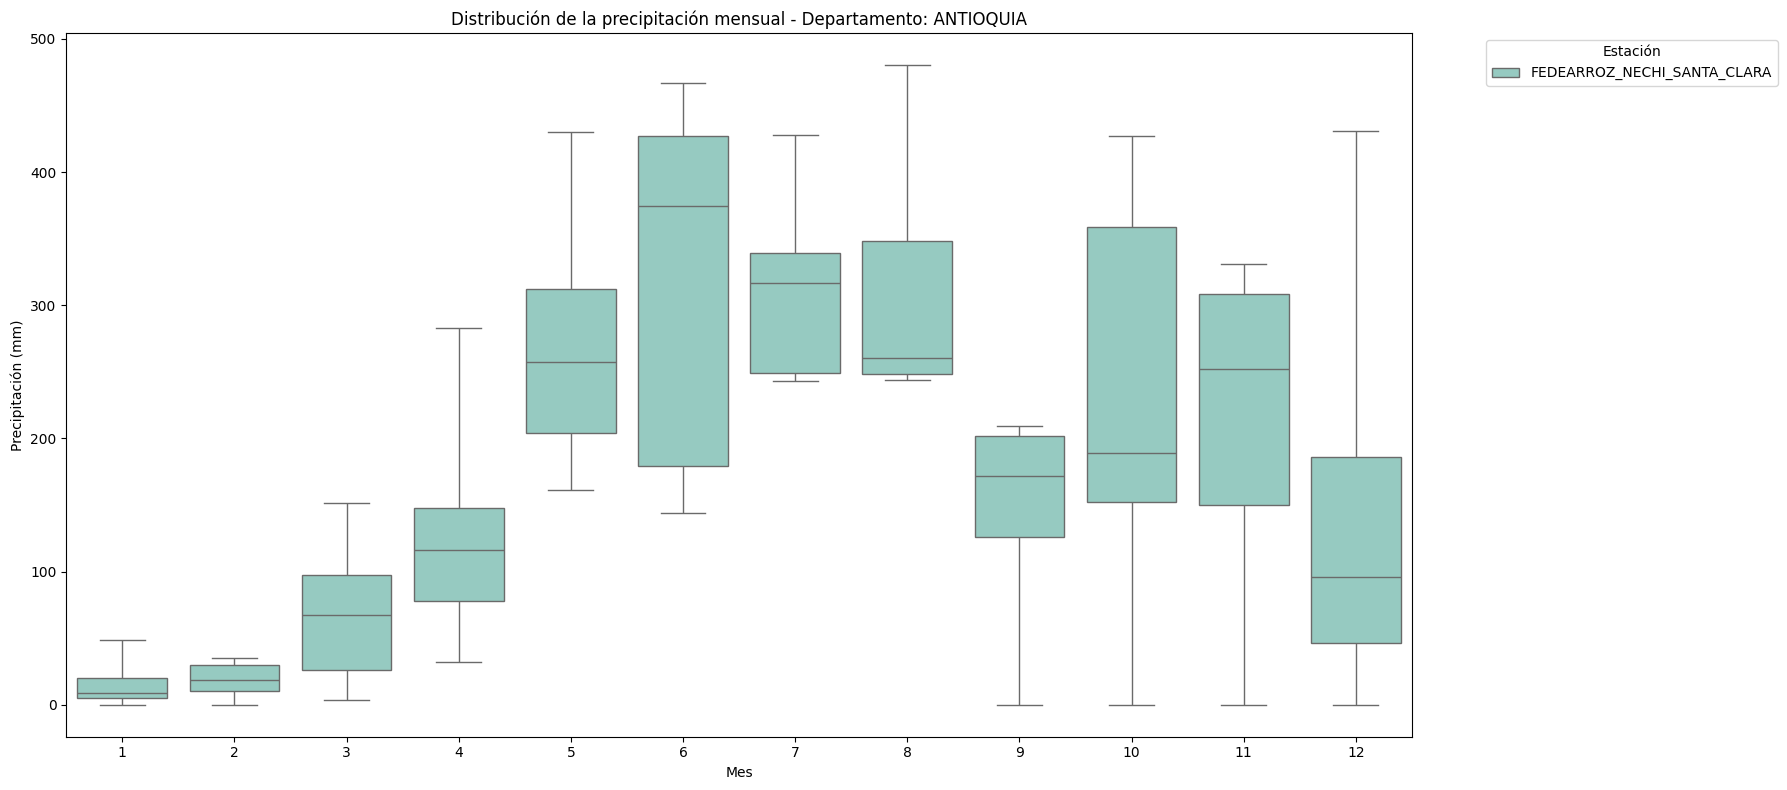

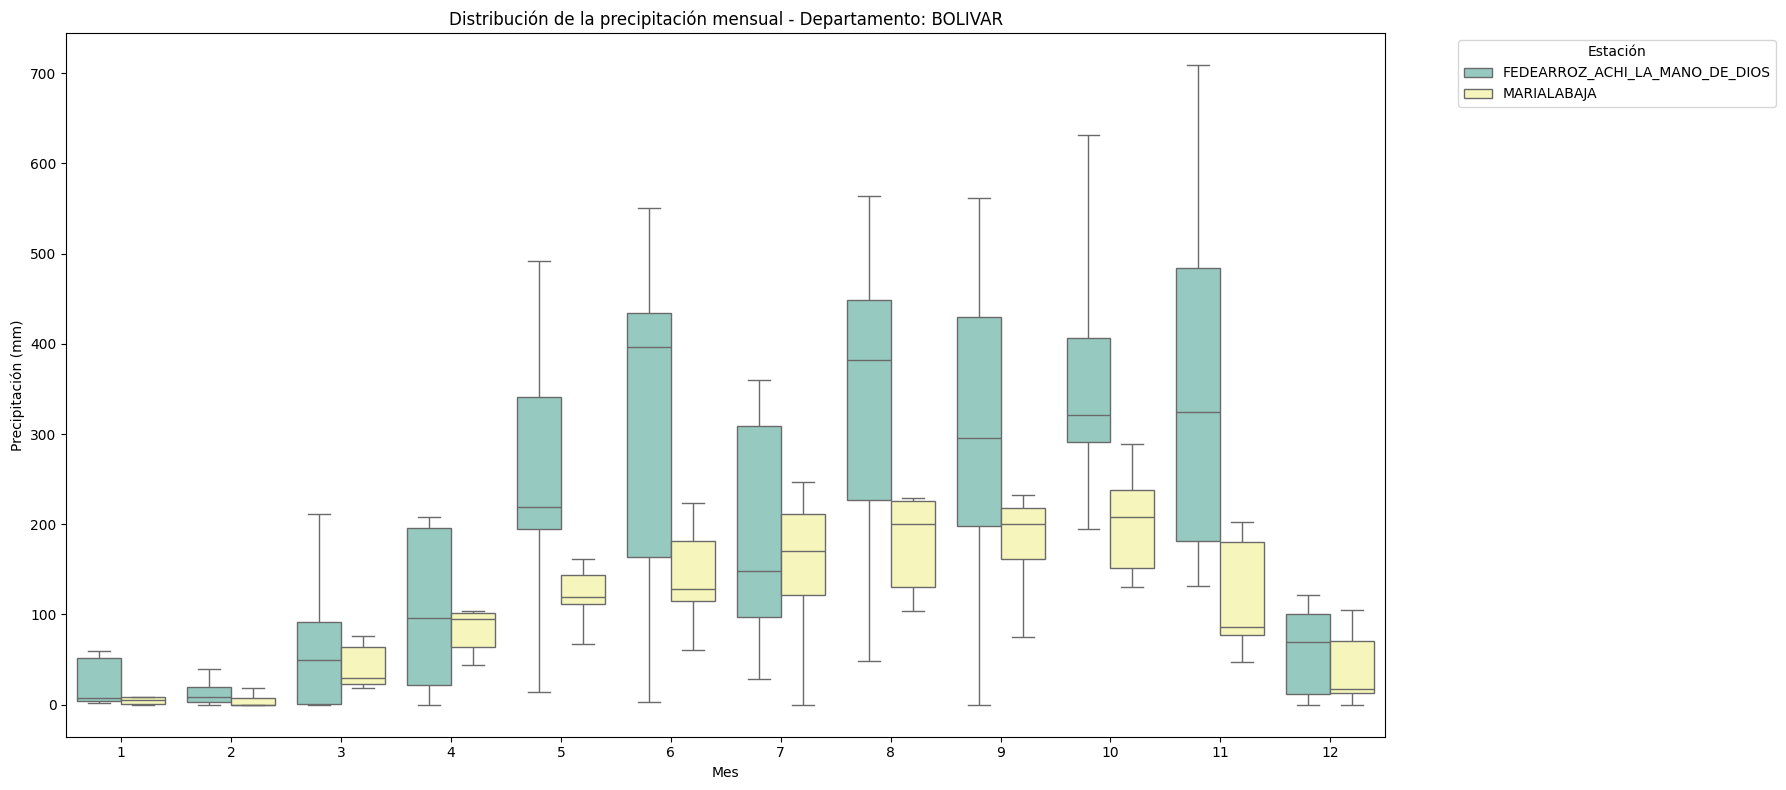

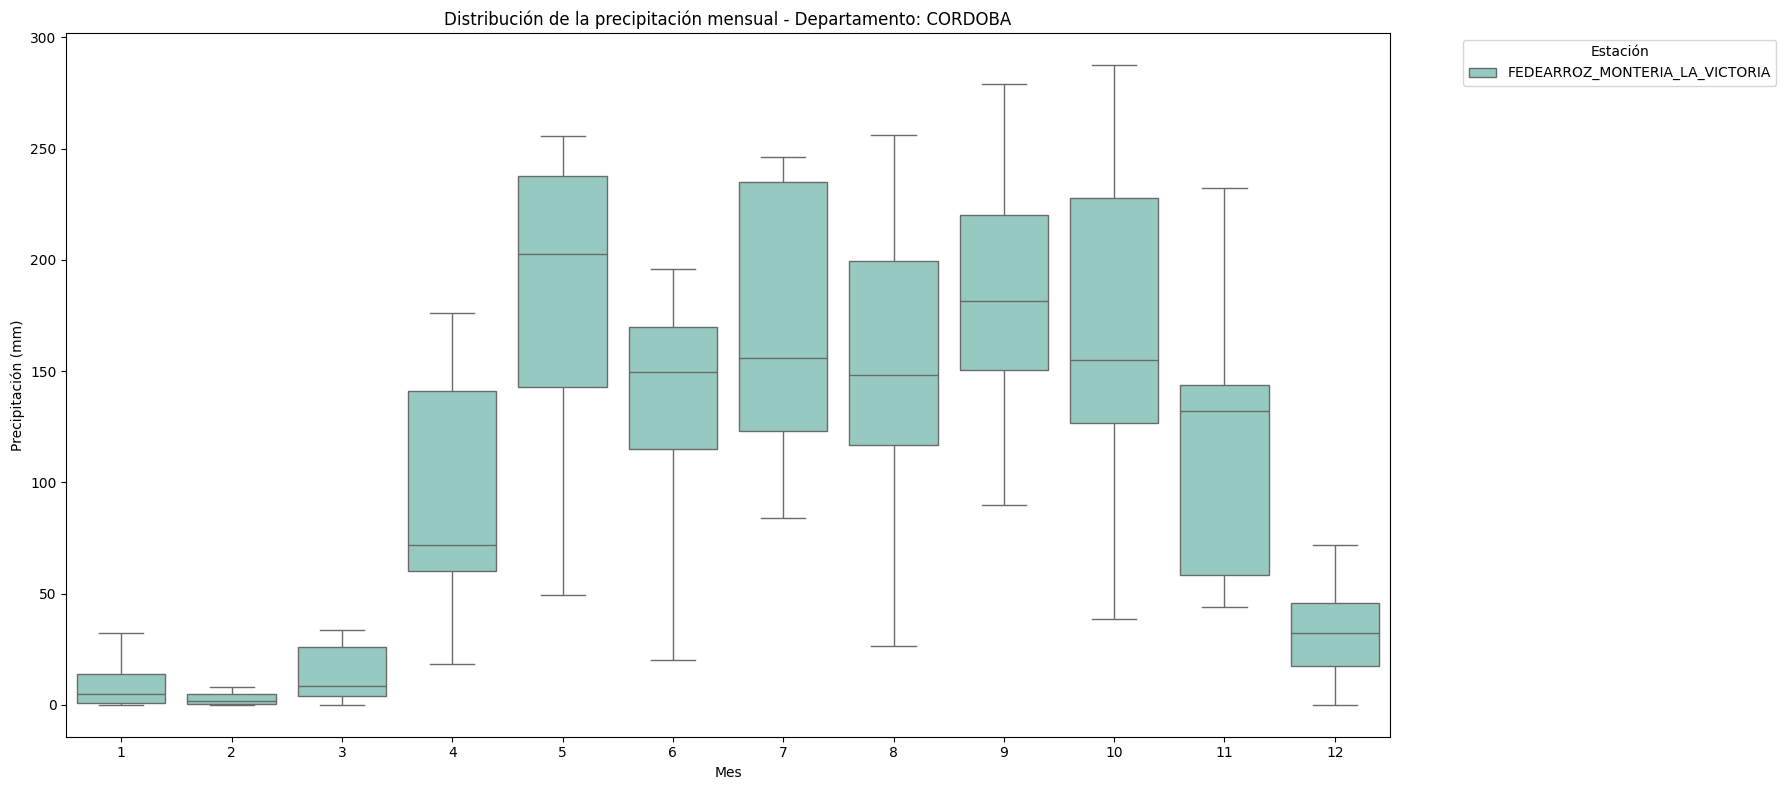

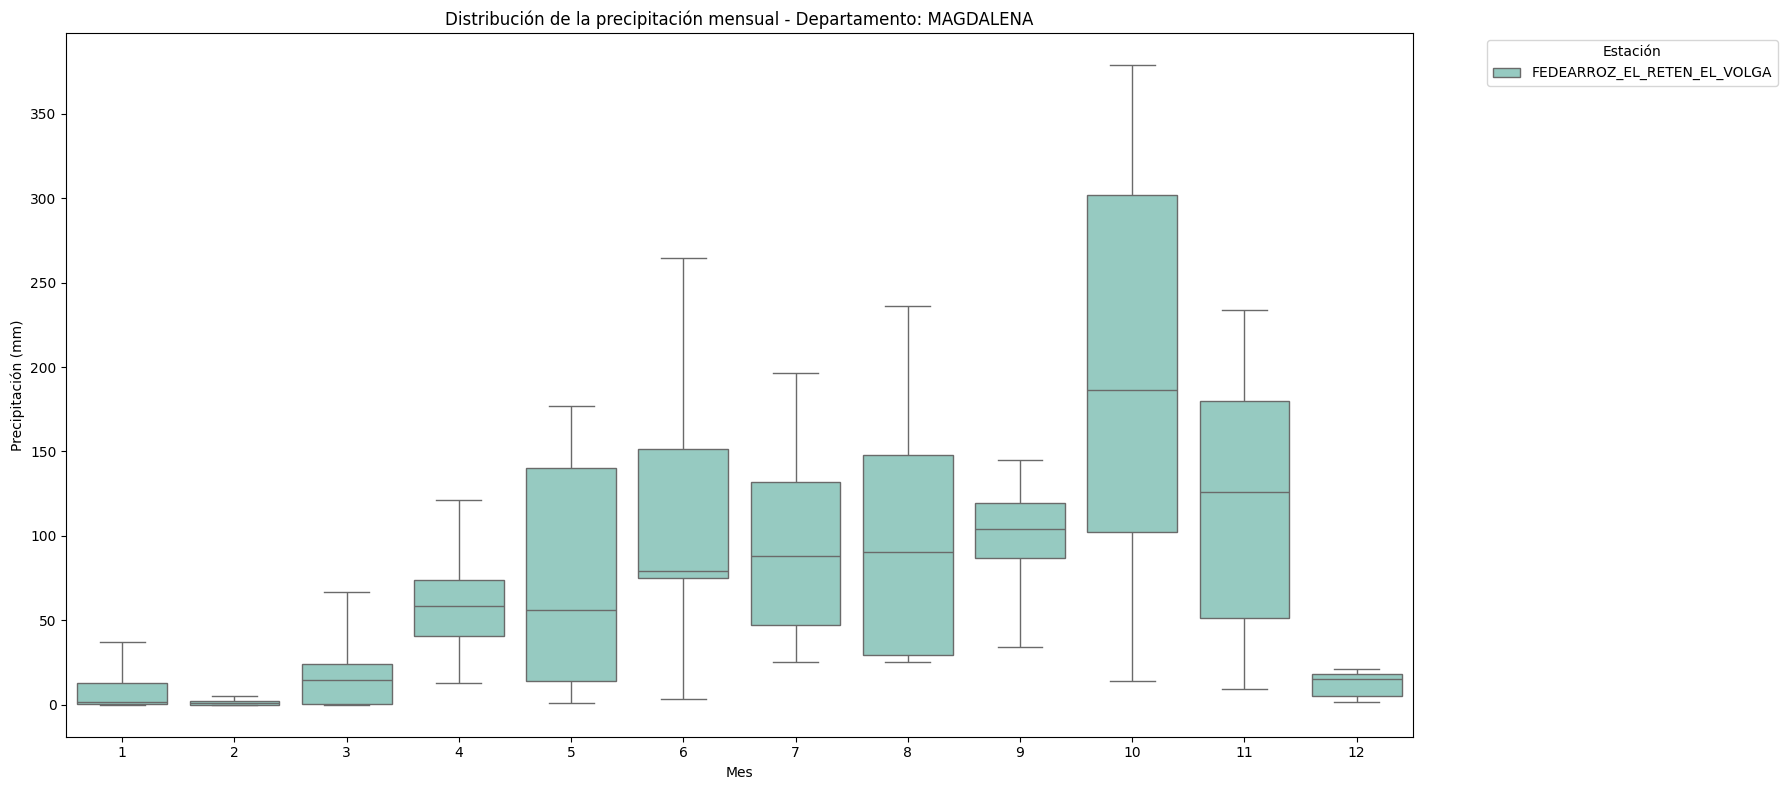

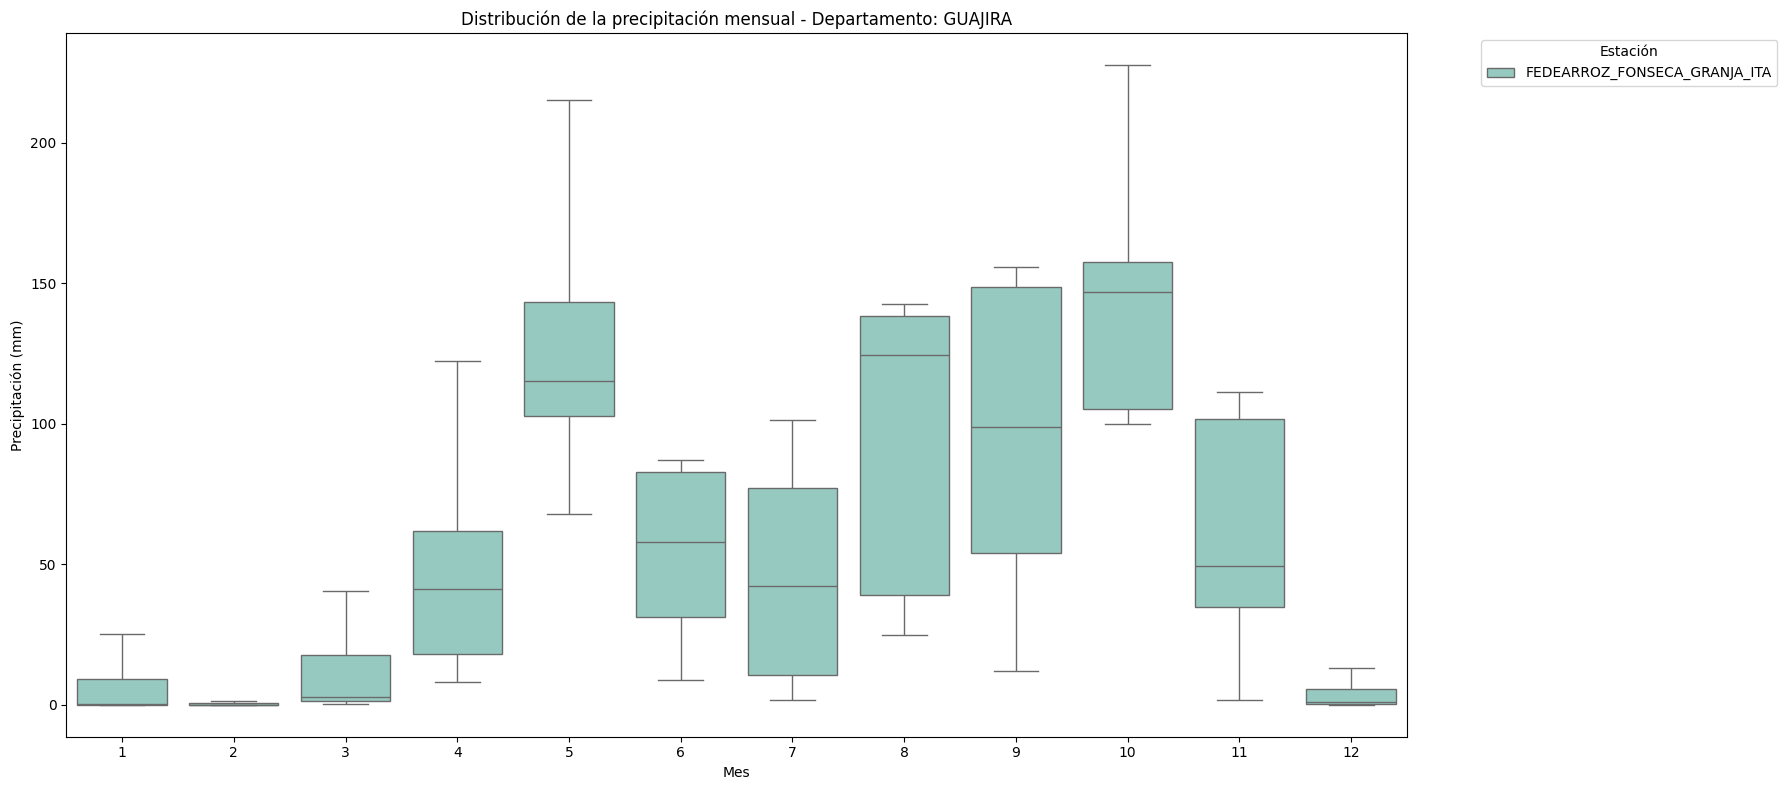

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'month_year' de Period a Timestamp si es necesario
if pd.api.types.is_period_dtype(monthly['month_year']):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())

# Extraer el mes de la columna 'month_year' para agrupar los boxplots por meses
monthly['mes'] = monthly['month_year'].dt.month

# Filtrar el DataFrame para la fuente IDEAM
df_ideam = monthly[monthly['fuente'] == 'ideam']

# Crear una gráfica separada para cada departamento
for dpto in df_ideam['dpto'].unique():
    df_dpto = df_ideam[df_ideam['dpto'] == dpto]
    
    plt.figure(figsize=(18, 8))
    
    # Crear los boxplots desagregados por estación y mes dentro del departamento
    sns.boxplot(x='mes', y='prec_month', hue='station', data=df_dpto, palette='Set3',whis=2, showfliers=False)
    
    # Añadir título y etiquetas
    plt.title(f'Distribución de la precipitación mensual - Departamento: {dpto}')
    plt.xlabel('Mes')
    plt.ylabel('Precipitación (mm)')
    
    # Ajustar la leyenda para que no se solape
    plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar el layout para que no se solapen los elementos
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()


# por eventos de lluvia

In [18]:
info_prec.head()

,lat,lon,dpto,mun,date,precipitation,station,evento_lluvia,mes
0,4.39333,-72.98889,META,UPIA,2015-07-06,0.0,BARRANCA_DE_UPIA,0.0,7
1,4.39333,-72.98889,META,UPIA,2015-07-07,0.0,BARRANCA_DE_UPIA,0.0,7
2,4.39333,-72.98889,META,UPIA,2015-07-08,NaN,BARRANCA_DE_UPIA,NaN,7
3,4.39333,-72.98889,META,UPIA,2015-07-09,NaN,BARRANCA_DE_UPIA,NaN,7
4,4.39333,-72.98889,META,UPIA,2015-07-10,NaN,BARRANCA_DE_UPIA,NaN,7


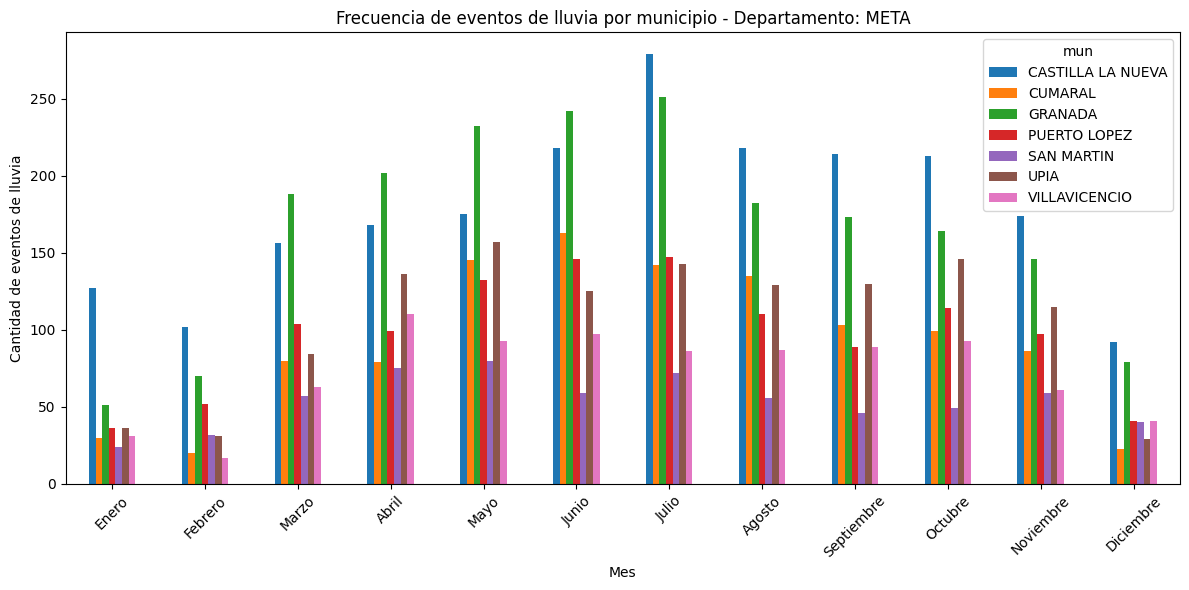

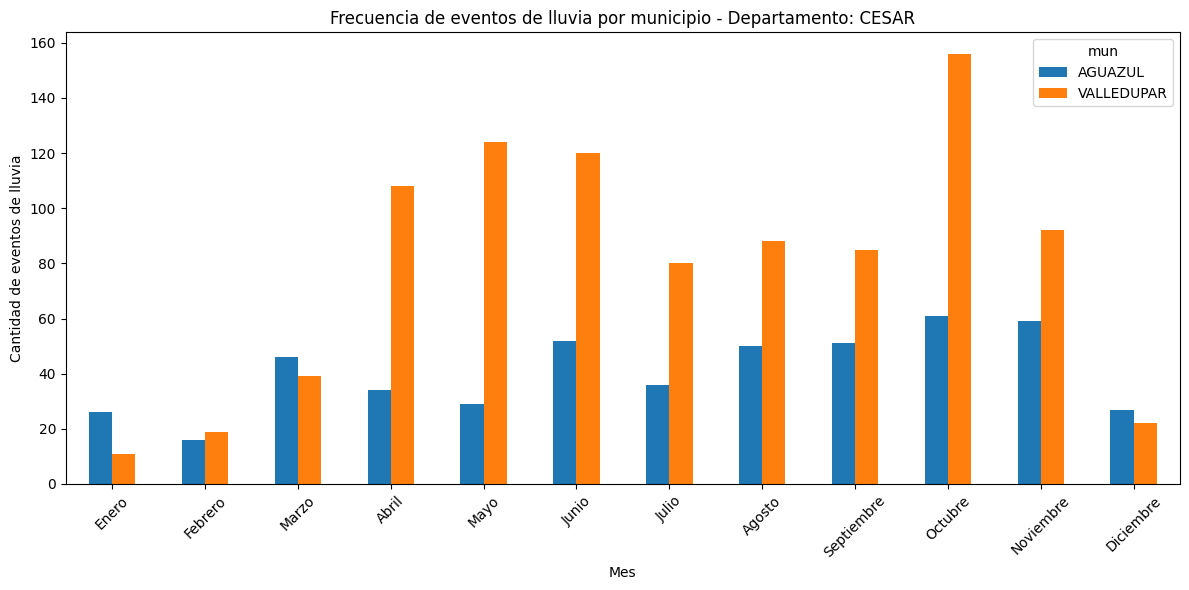

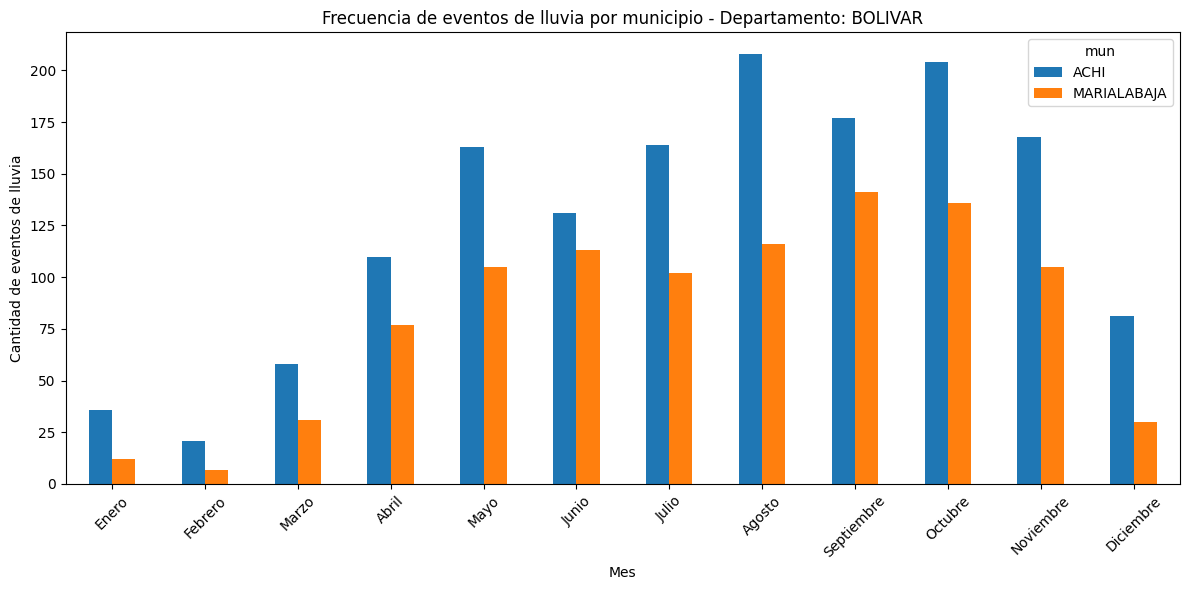

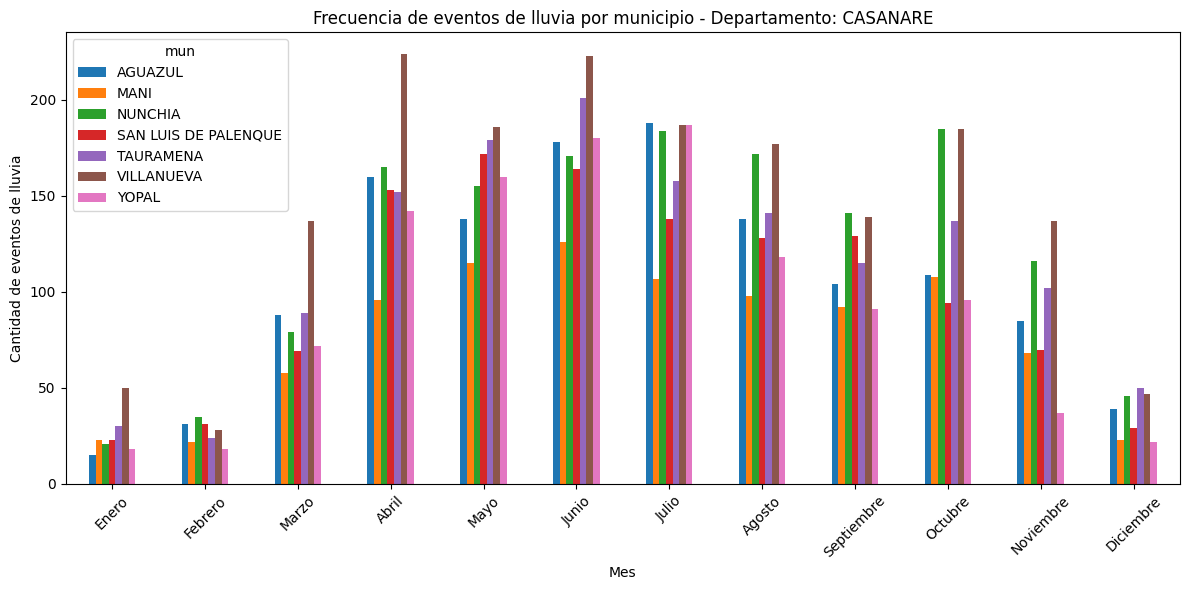

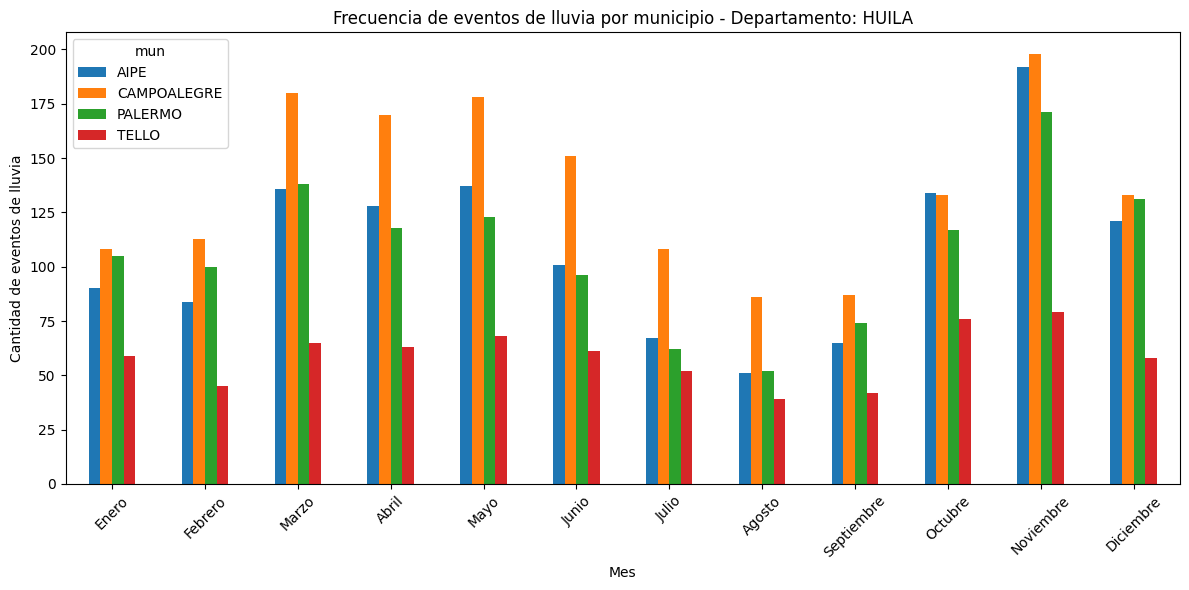

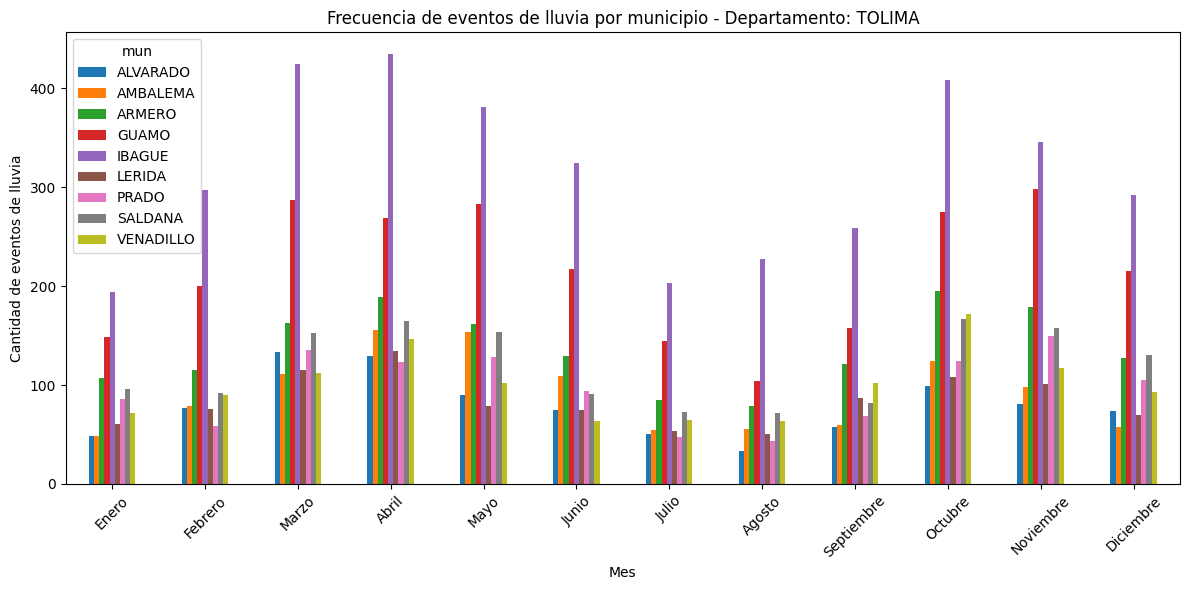

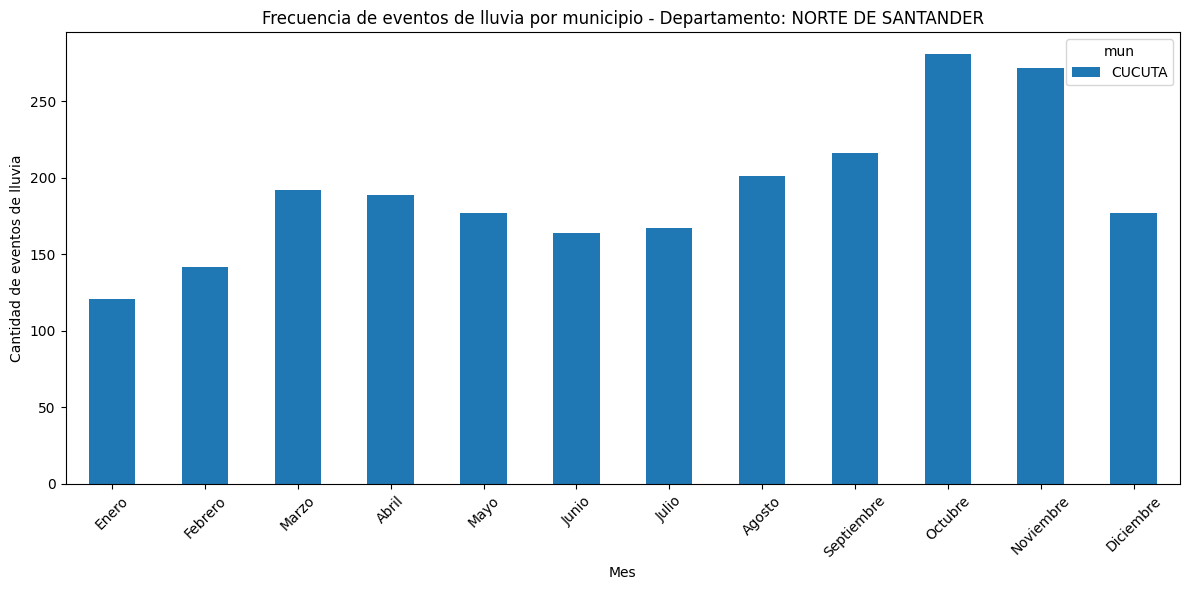

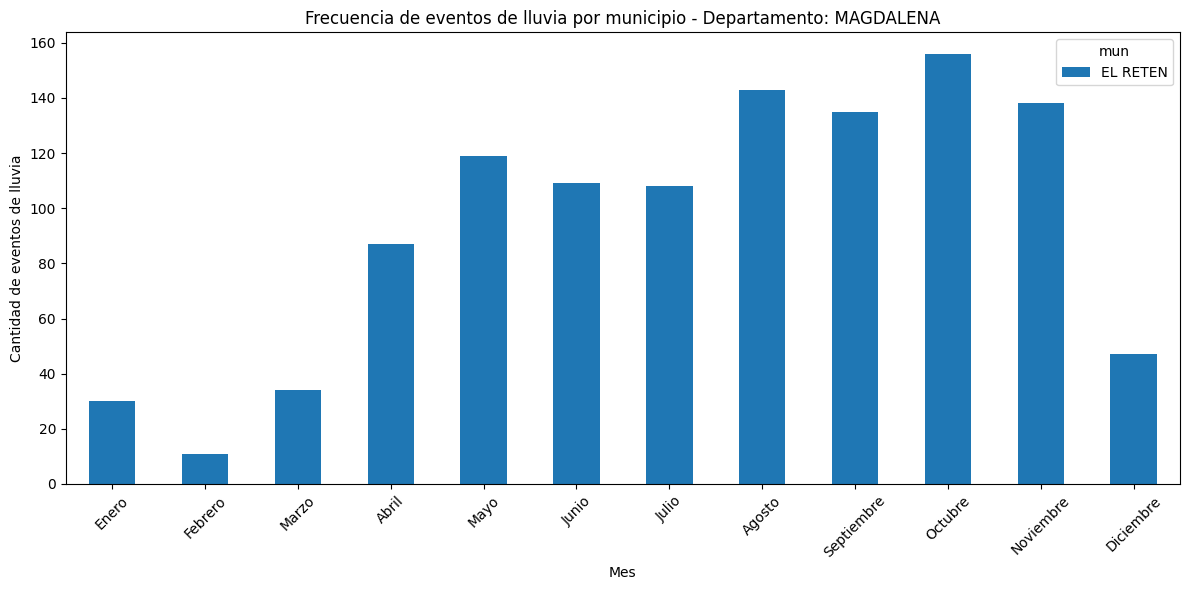

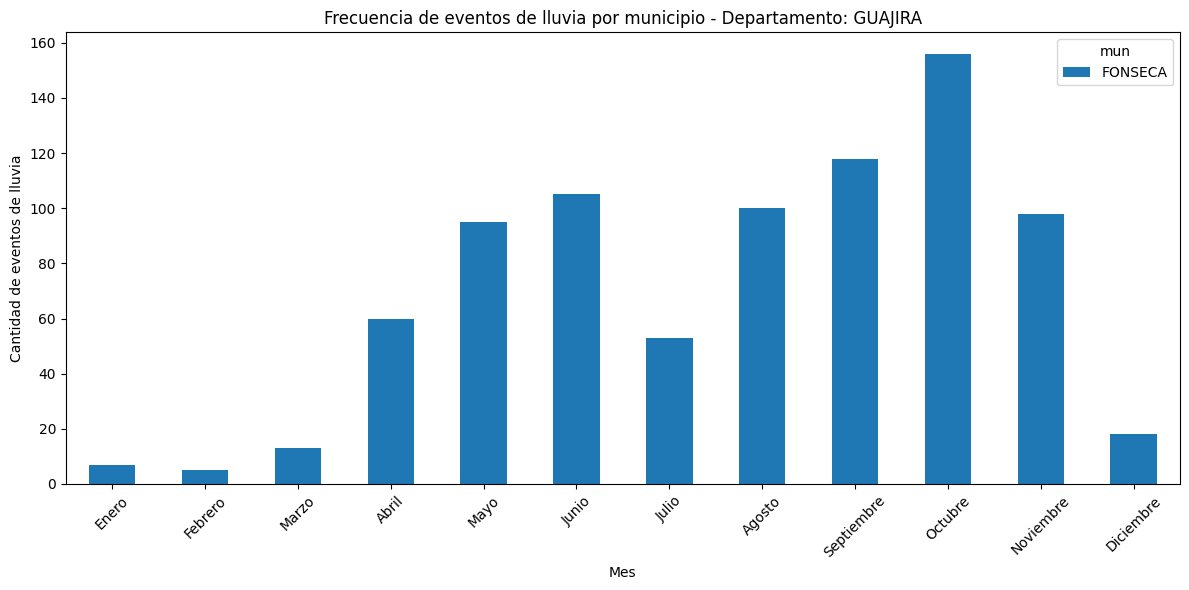

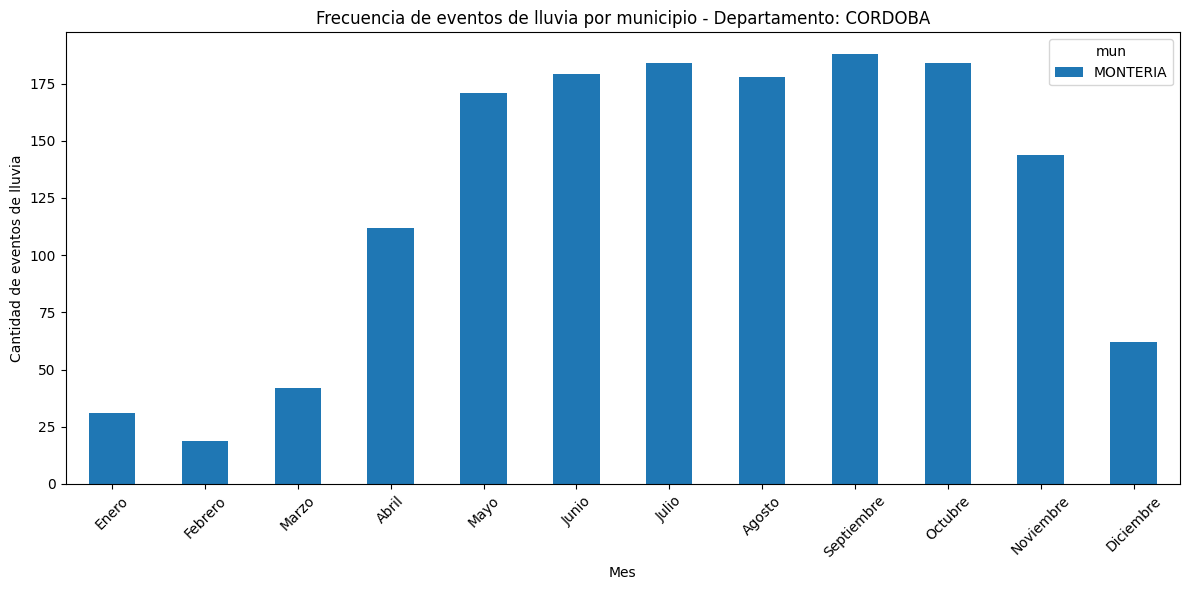

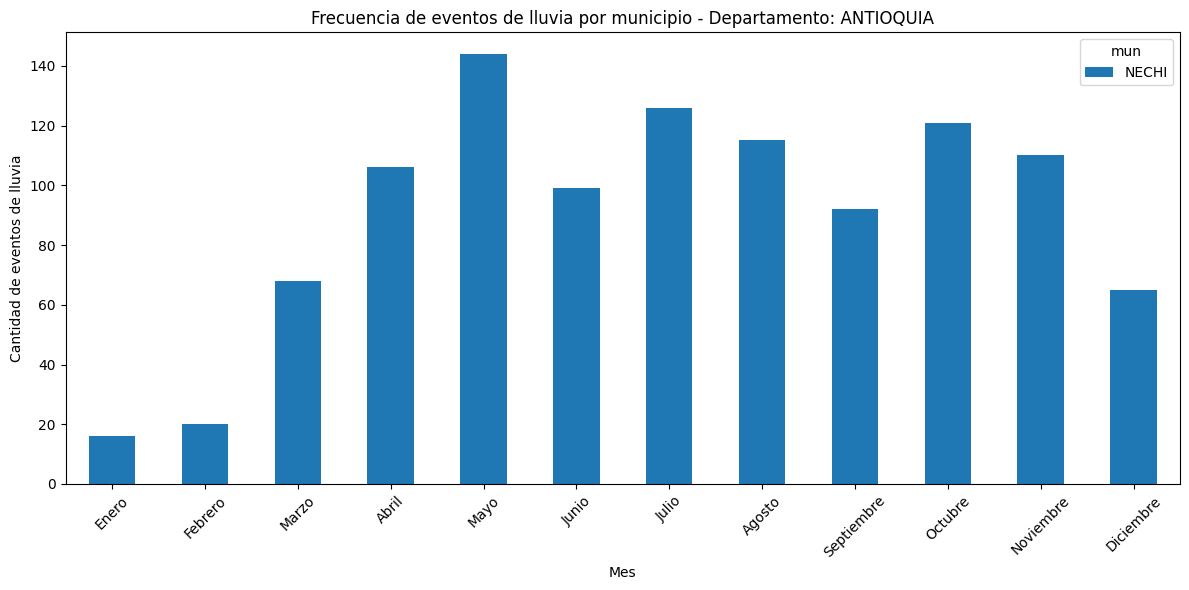

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'date' esté en formato datetime
info_prec['date'] = pd.to_datetime(info_prec['date'])

# Crear una columna que extraiga el mes del 'date'
info_prec['mes'] = info_prec['date'].dt.month

# Filtrar solo los eventos de lluvia (evento_lluvia == 1)
df_eventos_lluvia = info_prec[info_prec['evento_lluvia'] == 1]

# Crear una gráfica separada para cada departamento
for dpto in df_eventos_lluvia['dpto'].unique():
    df_dpto = df_eventos_lluvia[df_eventos_lluvia['dpto'] == dpto]
    
    # Contar los eventos de lluvia por mes y municipio
    eventos_por_mes_municipio = df_dpto.groupby(['mes', 'mun']).size().unstack(fill_value=0)
    
    # Crear la gráfica de barras donde el eje X es el mes y las barras son los municipios
    eventos_por_mes_municipio.plot(kind='bar', figsize=(12, 6))
    
    # Añadir título y etiquetas
    plt.title(f'Frecuencia de eventos de lluvia por municipio - Departamento: {dpto}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de eventos de lluvia')
    
    # Ajustar los nombres de los meses en el eje X
    plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)

    # Ajustar el layout para que no se solapen los elementos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()


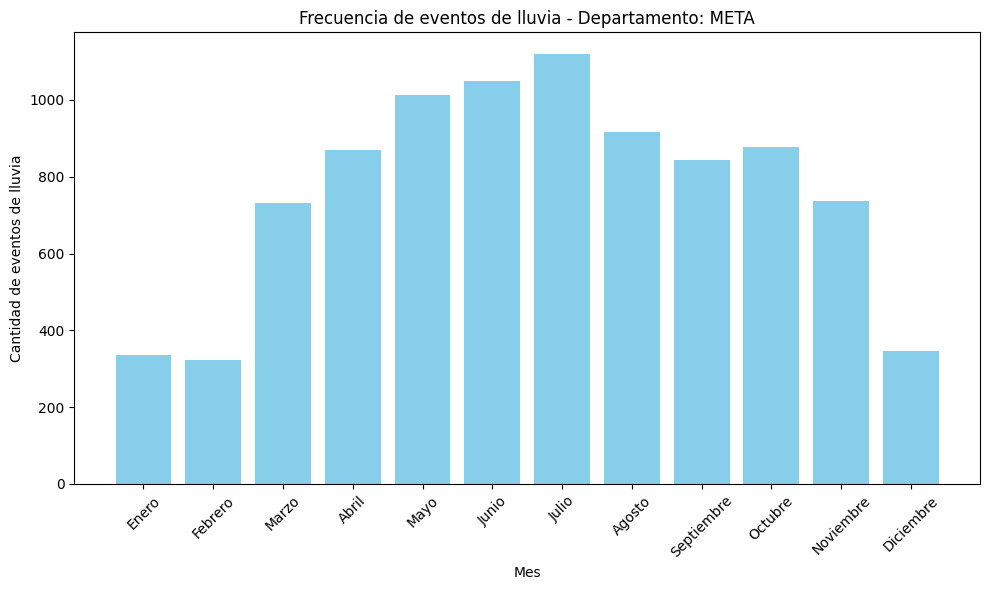

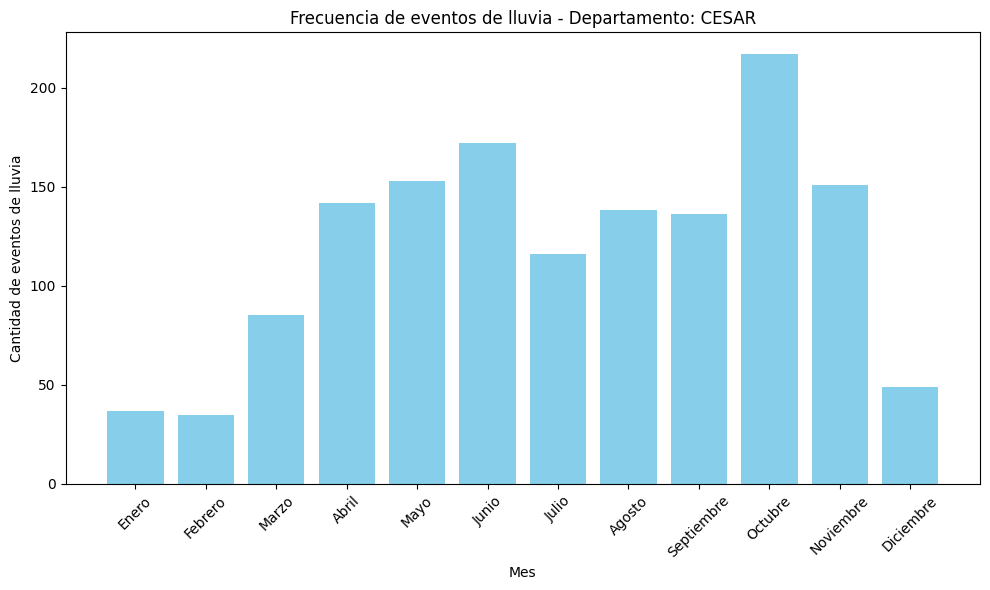

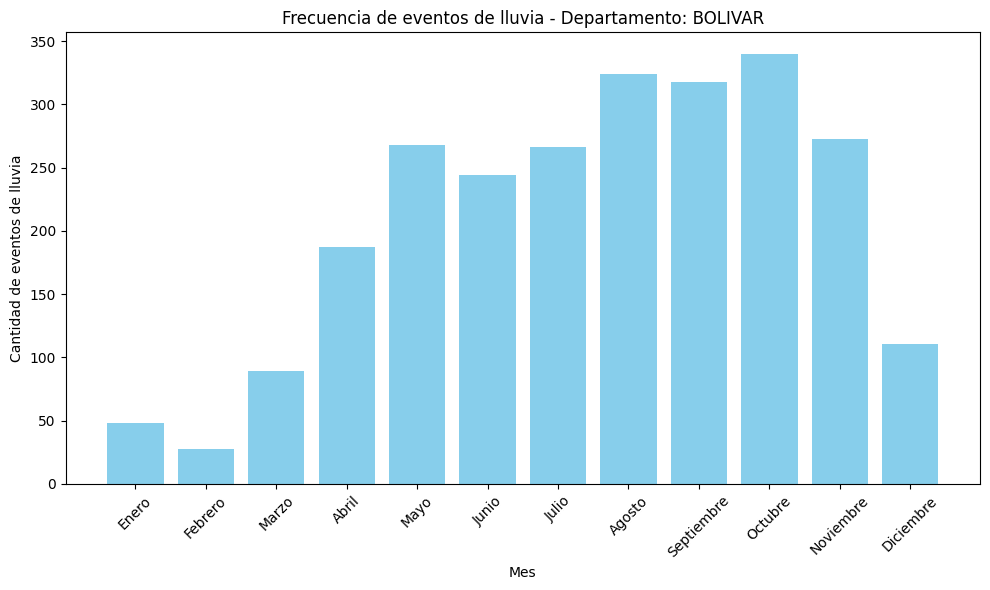

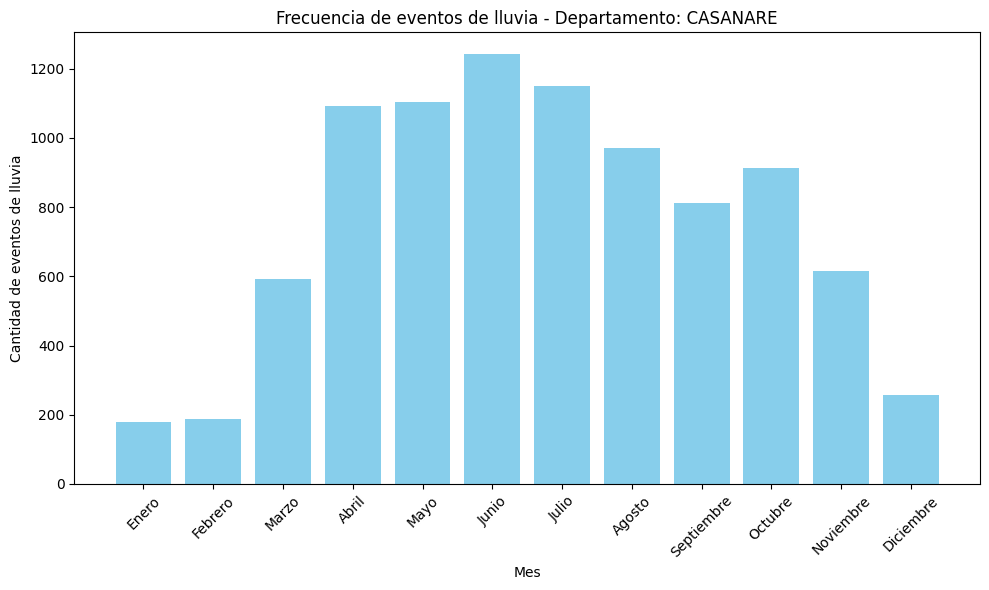

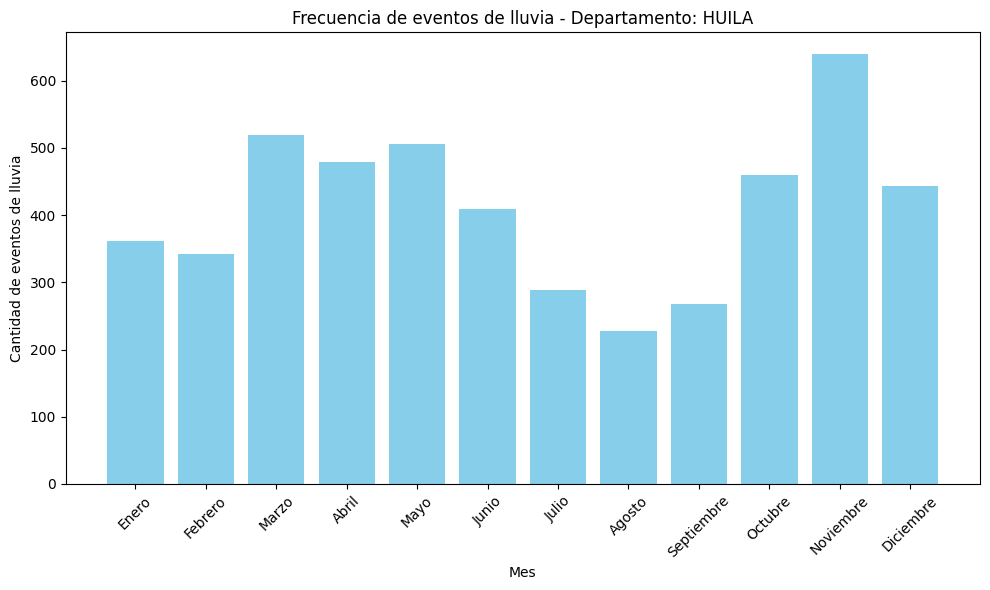

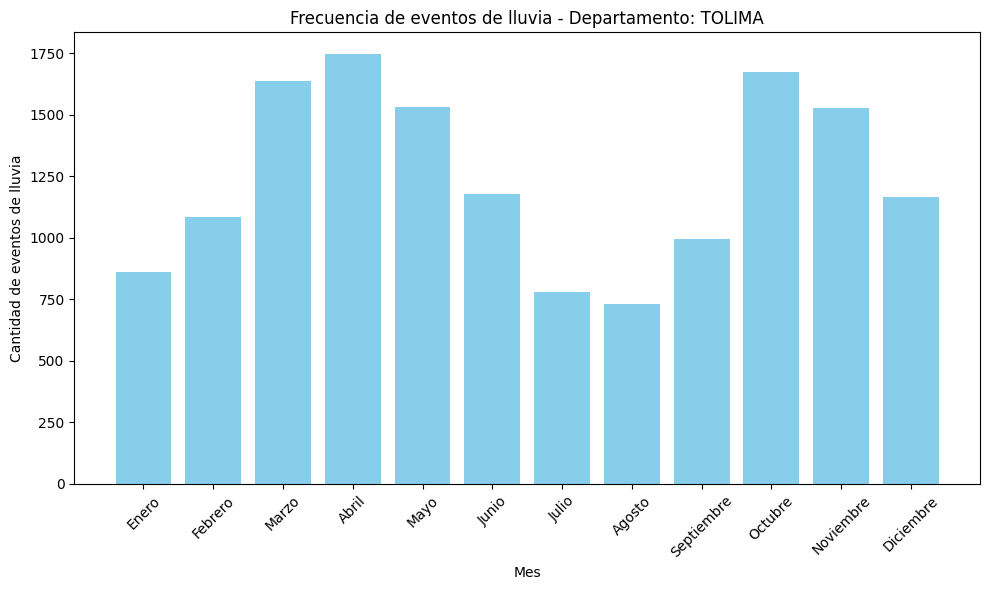

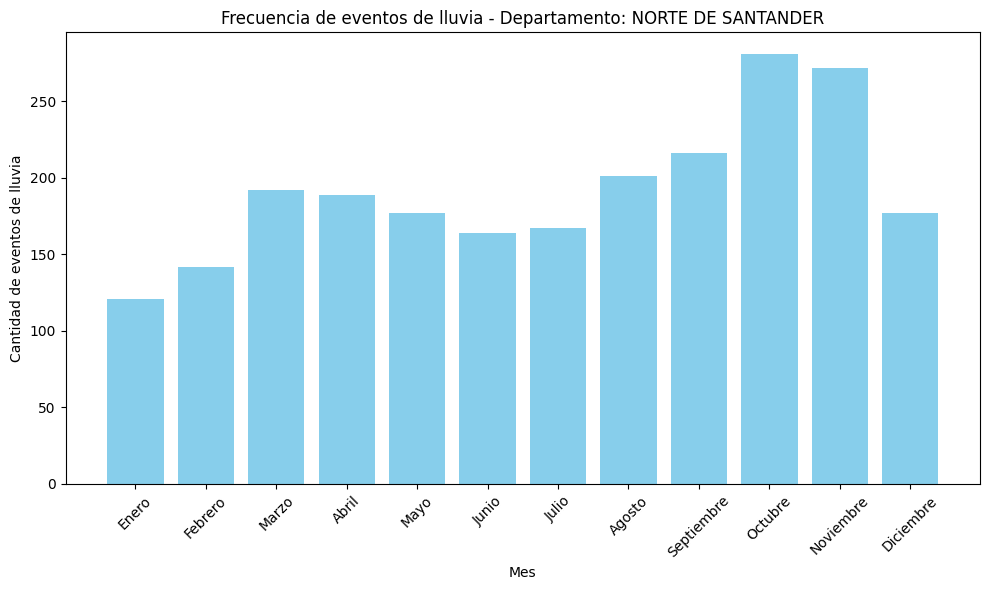

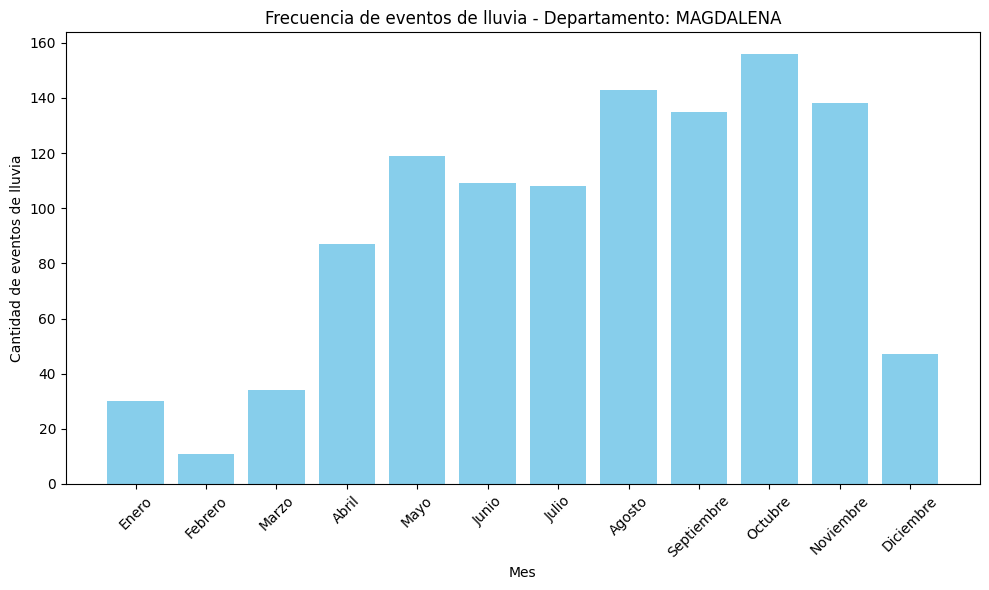

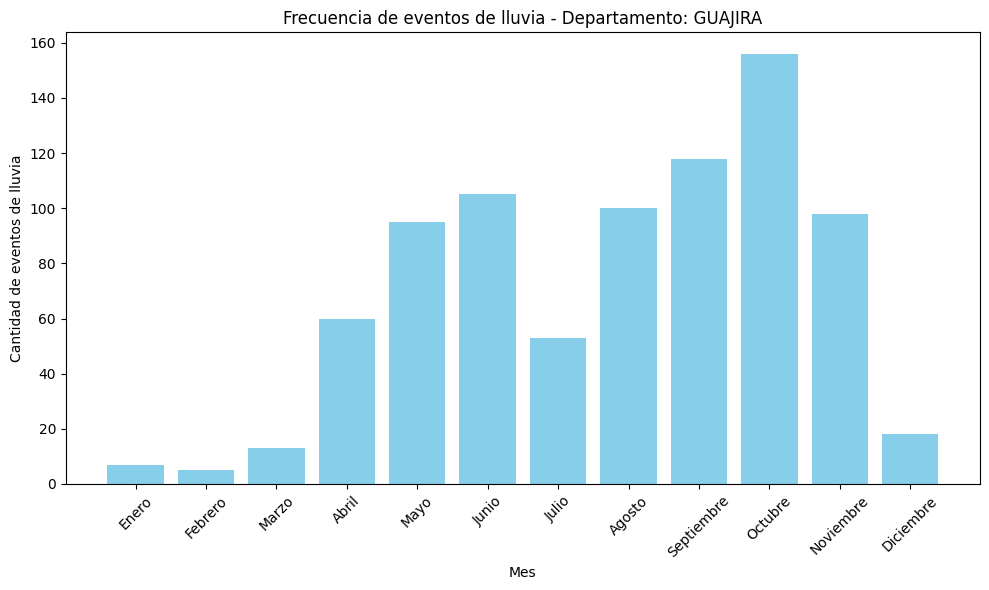

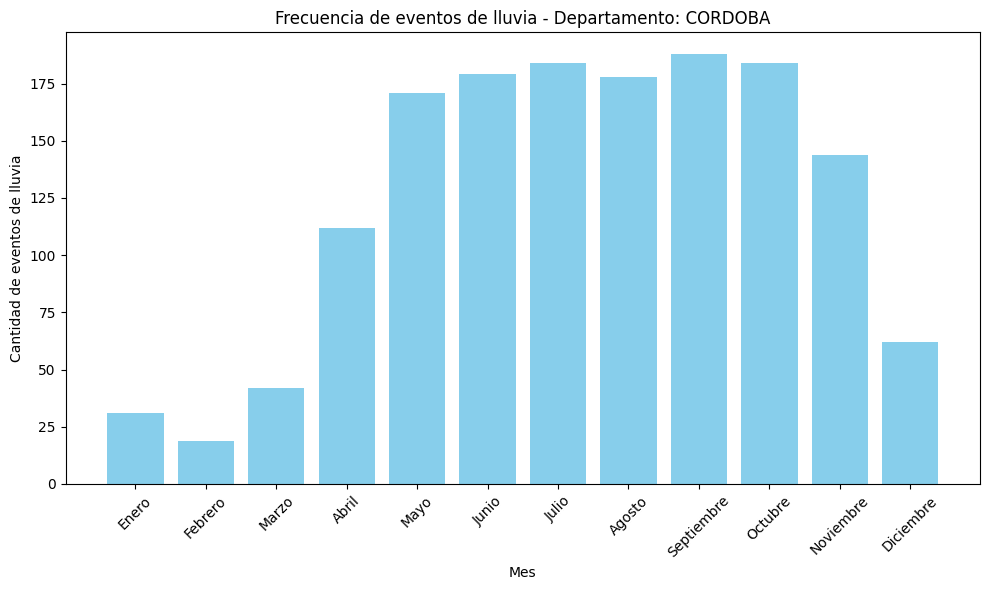

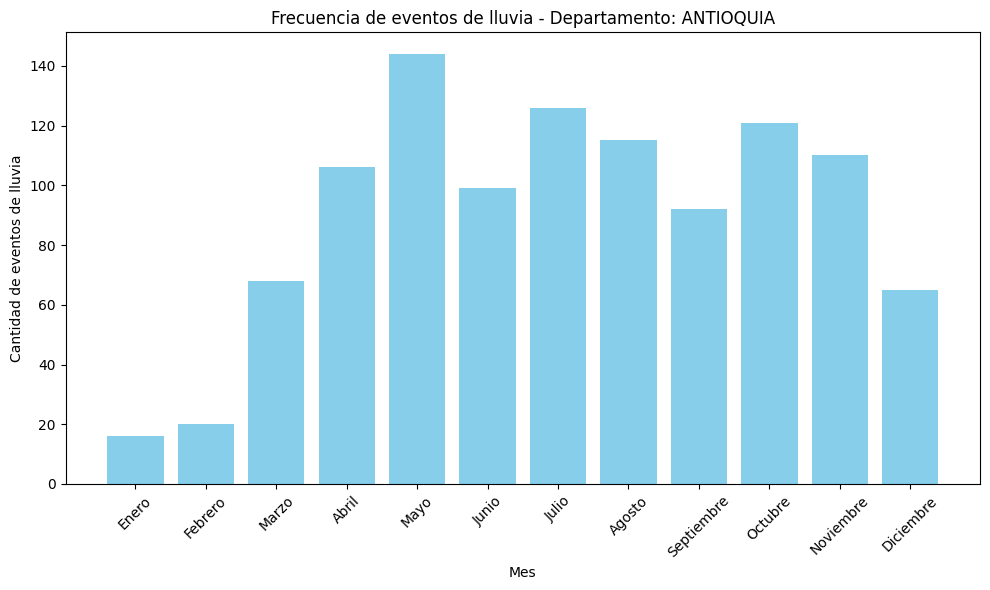

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'date' esté en formato datetime
info_prec['date'] = pd.to_datetime(info_prec['date'])

# Crear una columna que extraiga el mes del 'date'
info_prec['mes'] = info_prec['date'].dt.month

# Filtrar solo los eventos de lluvia (evento_lluvia == 1)
df_eventos_lluvia = info_prec[info_prec['evento_lluvia'] == 1]

# Crear una gráfica separada para cada departamento
for dpto in df_eventos_lluvia['dpto'].unique():
    df_dpto = df_eventos_lluvia[df_eventos_lluvia['dpto'] == dpto]
    
    # Contar los eventos de lluvia por mes
    eventos_por_mes = df_dpto.groupby('mes').size()
    
    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.bar(eventos_por_mes.index, eventos_por_mes.values, color='skyblue')

    # Añadir título y etiquetas
    plt.title(f'Frecuencia de eventos de lluvia - Departamento: {dpto}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de eventos de lluvia')
    
    # Ajustar la rotación de los ticks en el eje X
    plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
    
    # Ajustar el layout para que no se solapen los elementos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()
